<a id="1.1"></a>
## <b> <span style='color:#E1B12D'>1. Importing Necessary Libraries</span></b> 

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns



import sklearn

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


# Styling
!pip install colorama
from colorama import Fore, Back, Style

In [2]:
import mysql.connector

conn = mysql.connector.connect(
      host="localhost",
      user="root",
      password="curiosity999",
      database="telecom"
    )

In [3]:
df_1 = pd.read_sql("SELECT * FROM telcomcustomerchurn1", conn)
df_1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

In [4]:
df_1.shape

(7043, 10)

In [5]:
df_1.size

70430

In [6]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


In [7]:
df_2 = pd.read_sql("SELECT * FROM telcomcustomerchurn2", conn)
df_2.head()

customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

In [8]:
df_2.shape

(7032, 12)

In [9]:
df_2.size

84384

In [10]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   OnlineBackup      7032 non-null   object 
 2   DeviceProtection  7032 non-null   object 
 3   TechSupport       7032 non-null   object 
 4   StreamingTV       7032 non-null   object 
 5   StreamingMovies   7032 non-null   object 
 6   Contract          7032 non-null   object 
 7   PaperlessBilling  7032 non-null   object 
 8   PaymentMethod     7032 non-null   object 
 9   MonthlyCharges    7032 non-null   float64
 10  TotalCharges      7032 non-null   float64
 11  Churn             7032 non-null   object 
dtypes: float64(2), object(10)
memory usage: 659.4+ KB


### Merging the two dataframes

In [11]:
merged_df = pd.merge(df_1, df_2, on= 'customerID')
merged_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [12]:
df1 = merged_df.copy()

In [13]:
df1.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges  Churn  
0           Electronic check          29.85         29.85     No  
1               Mailed check          56.95       1889.50     No  
2               Mailed check          53.85        108.15    Yes  
3  Bank transfer (automatic)          42.30       1840.75     No  
4           Electronic check          70.70        151.65    Yes  

[5 rows x 21 columns]

In [14]:
df1.shape

(7032, 21)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


- Most of the features are of 'object' datatype, they will need to be encoded.

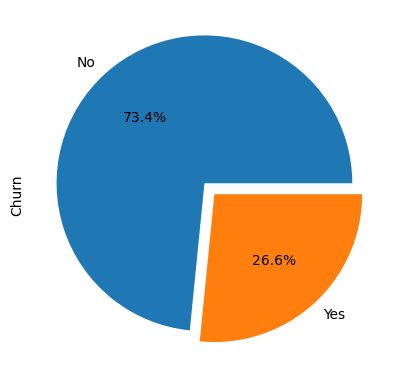

In [16]:
# Let us first analyze the distribution of the target variable
df1['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%',explode=[0.1,0])
plt.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
The target variable 'Churn' is highly imbalanced.


##   <span style='color:#E1B12D'>2. DATA CLEANING</span></b> 

Checking missing values and droping the missing value, if any

In [17]:
def check_missing_values(df):
    percent_missing = df.isnull().sum() * 100 / len(df)
    return percent_missing


def drop_missing_values(df): 
    df = df.dropna(axis = 0)
    return df

In [18]:
check_missing_values(df1)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    There are no missing values in the given dataset.

Checking for duplicates and dropping, if any:

In [19]:
def check_duplicates(df):
    return df.duplicated().any()

def drop_duplicates(df):
    # drop the duplicate records
    df = df.drop_duplicates()
    
    return df

In [20]:
check_duplicates(df1)

False

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    There are no duplicates in the given dataset.

Dropping the redundant columns:

In [21]:
# Drop columns

def drop_column(df):

    print(Fore.GREEN+"\n\nDo you wish to drop any columns ? ",Fore.BLACK+"<yes> or <no>")
    answer_drop=str(input())

    if answer_drop=='yes':
        print(Fore.GREEN+"\nEnter the column names seprated by",Fore.BLACK+"<,>")
        print(Style.RESET_ALL)
        Drop_col=str(input())
        Trans = list(Drop_col.split(","))
        for i in range(len(Trans)):
            a=Trans[i]
            df = df.drop(Drop_col,axis=1)
        return df    

In [23]:
df2 = drop_column(df1)
df2.head()



Do you wish to drop any columns ?  <yes> or <no>
yes

Enter the column names seprated by <,>

customerID


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### LABEL ENCODING

Making a copy of the cleaned dataframe df2.

In [24]:
df3 = df2.copy()
df3.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [25]:
df2.select_dtypes(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

##### We will use label encoding on columns that have exactly two unique values.

In [26]:
le = LabelEncoder()
def categorical_to_numeric(df):
    list_cols = list(df.select_dtypes(include=['object']).columns)
    for col in list_cols:
        if len(df[col].unique()) == 2:
            df[col] = le.fit_transform(list(df[col]))

In [27]:
categorical_to_numeric(df3)

In [28]:
df3.sample(10)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4217       0              0        1           0      71             1   
6664       1              0        0           0       7             1   
5943       0              0        0           1       4             1   
785        0              0        1           0      34             1   
4106       1              0        0           0      36             1   
2012       1              0        1           0      38             1   
5430       1              1        0           0      32             1   
4945       0              0        0           0      29             1   
3880       1              0        0           0      11             1   
6213       1              0        0           0      66             1   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
4217            No              No  No internet service  No internet service   
6664           Yes              No  No internet service  No internet service   
5943           Yes              No  No internet service  No internet service   
785            Yes             DSL                  Yes                   No   
4106            No              No  No internet service  No internet service   
2012            No              No  No internet service  No internet service   
5430           Yes     Fiber optic                   No                   No   
4945            No              No  No internet service  No internet service   
3880            No     Fiber optic                   No                  Yes   
6213           Yes     Fiber optic                   No                  Yes   

         DeviceProtection          TechSupport          StreamingTV  \
4217  No internet service  No internet service  No internet service   
6664  No internet service  No internet service  No internet service   
5943  No internet service  No internet service  No internet service   
785                    No                  Yes                   No   
4106  No internet service  No internet service  No internet service   
2012  No internet service  No internet service  No internet service   
5430                   No                   No                  Yes   
4945  No internet service  No internet service  No internet service   
3880                   No                   No                   No   
6213                   No                   No                   No   

          StreamingMovies        Contract  PaperlessBilling  \
4217  No internet service        Two year                 0   
6664  No internet service  Month-to-month                 0   
5943  No internet service  Month-to-month                 1   
785                    No  Month-to-month                 1   
4106  No internet service        One year                 1   
2012  No internet service        Two year                 0   
5430                  Yes  Month-to-month                 1   
4945  No internet service        Two year                 0   
3880                   No  Month-to-month                 0   
6213                  Yes  Month-to-month                 0   

                  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
4217               Mailed check           19.60       1416.50      0  
6664               Mailed check           23.50        173.00      0  
5943               Mailed check           25.45         84.20      0  
785   Bank transfer (automatic)           60.85       2003.60      0  
4106    Credit card (automatic)           20.35        695.85      0  
2012  Bank transfer (automatic)           20.40        743.50      0  
5430    Credit card (automatic)           96.15       3019.25      1  
4945               Mailed check           19.40        554.25      0  
3880           Electronic check           74.95        815.50      1  
6213    Credit card (automatic)           89.40       5976.90      0

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [30]:
# building a function that can give the count of unique values of each feature, 
# so that we know what features require one-hot-encoding

def unique_values_count_1(df):    
    list_cols = list(df.columns)
    l1 = []
    for col in list_cols:
        x = len(df[col].unique())
        l1.append(x)
    l1.sort(reverse = True) 
    return l1

In [31]:
unique_values_count_1(df3)

[6530, 1584, 72, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2]

In [32]:
# separarting out the numerical and categorical features

def categoric_numeric_separator_1(df):
    list_cols = list(df.columns)
    categorical_col = []
    numerical_col = []
    
    for col in list_cols:
        if len(df[col].unique()) > 5:
            numerical_col.append(col) 
        else:
            categorical_col.append(col)
    #categorical_col = categorical_col[:-1] # Excluding the target variable 'Churn'        
    return categorical_col, numerical_col

In [33]:
categorical_col, numerical_col = categoric_numeric_separator_1(df3)

In [34]:
numerical_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [35]:
categorical_col

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

### ONE HOT ENCODING

Creating a copy of the label encoded dataframe df3.

In [36]:
df4 = df3.copy()

In [37]:
df4.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

   PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0                 1           Electronic check           29.85         29.85   
1                 0               Mailed check           56.95       1889.50   
2                 1               Mailed check           53.85        108.15   
3                 0  Bank transfer (automatic)           42.30       1840.75   
4                 1           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

In [38]:
numerical_col, categorical_col[:-1]

(['tenure', 'MonthlyCharges', 'TotalCharges'],
 ['gender',
  'SeniorCitizen',
  'Partner',
  'Dependents',
  'PhoneService',
  'MultipleLines',
  'InternetService',
  'OnlineSecurity',
  'OnlineBackup',
  'DeviceProtection',
  'TechSupport',
  'StreamingTV',
  'StreamingMovies',
  'Contract',
  'PaperlessBilling',
  'PaymentMethod'])

In [39]:
df4.shape

(7032, 20)

In [40]:
def columns_to_one_hot_encode(df):
    list_cols = list(categorical_col[:-1])
    l1=[]
    for col in list_cols:
        if len(df[col].unique()) > 2:
            l1.append(col)
    return l1        

In [41]:
columns_to_one_hot_encode(df4)

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

##### We will use one-hot encoding on the columns that have more than 2 unique values.

In [42]:
def one_hot_encoder(df):
    list_cols = columns_to_one_hot_encode(df)
    for col in list_cols:
            dummy_df = pd.get_dummies(df[col], prefix = col, drop_first=True)
            df = pd.concat([df, dummy_df], axis = 1)
            df = df.drop(col, axis=1)
    return df

In [43]:
df4 = one_hot_encoder(df4)

In [44]:
df4.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7032.000000    7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.504693       0.162400     0.482509     0.298493    32.421786   
std       0.500014       0.368844     0.499729     0.457629    24.545260   
min       0.000000       0.000000     0.000000     0.000000     1.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7032.000000       7032.000000     7032.000000   7032.000000   
mean       0.903299          0.592719       64.798208   2283.300441   
std        0.295571          0.491363       30.085974   2266.771362   
min        0.000000          0.000000       18.250000     18.800000   
25%        1.000000          0.000000       35.587500    401.450000   
50%        1.000000          1.000000       70.350000   1397.475000   
75%        1.000000          1.000000       89.862500   3794.737500   
max        1.000000          1.000000      118.750000   8684.800000   

             Churn  ...  TechSupport_Yes  StreamingTV_No internet service  \
count  7032.000000  ...      7032.000000                      7032.000000   
mean      0.265785  ...         0.290102                         0.216155   
std       0.441782  ...         0.453842                         0.411650   
min       0.000000  ...         0.000000                         0.000000   
25%       0.000000  ...         0.000000                         0.000000   
50%       0.000000  ...         0.000000                         0.000000   
75%       1.000000  ...         1.000000                         0.000000   
max       1.000000  ...         1.000000                         1.000000   

       StreamingTV_Yes  StreamingMovies_No internet service  \
count      7032.000000                          7032.000000   
mean          0.384386                             0.216155   
std           0.486484                             0.411650   
min           0.000000                             0.000000   
25%           0.000000                             0.000000   
50%           0.000000                             0.000000   
75%           1.000000                             0.000000   
max           1.000000                             1.000000   

       StreamingMovies_Yes  Contract_One year  Contract_Two year  \
count          7032.000000        7032.000000        7032.000000   
mean              0.388367           0.209329           0.239619   
std               0.487414           0.406858           0.426881   
min               0.000000           0.000000           0.000000   
25%               0.000000           0.000000           0.000000   
50%               0.000000           0.000000           0.000000   
75%               1.000000           0.000000           0.000000   
max               1.000000           1.000000           1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7032.000000                     7032.000000   
mean                                0.216297                        0.336320   
std                                 0.411748                        0.472483   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       PaymentMethod_Mailed check  
count                 7032.000000  
mean               

In [45]:
df4.shape

(7032, 31)

In [46]:
df4.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

#  <span style='color:#E1B12D'>Exploratory Data Analysis</span></b> 

In [47]:
df3[numerical_col].describe().T

count         mean          std    min       25%       50%  \
tenure          7032.0    32.421786    24.545260   1.00    9.0000    29.000   
MonthlyCharges  7032.0    64.798208    30.085974  18.25   35.5875    70.350   
TotalCharges    7032.0  2283.300441  2266.771362  18.80  401.4500  1397.475   

                      75%      max  
tenure            55.0000    72.00  
MonthlyCharges    89.8625   118.75  
TotalCharges    3794.7375  8684.80

In [48]:
df3.describe(include='object').T

count unique               top  freq
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaymentMethod     7032      4  Electronic check  2365

In [49]:
# df2 is the dataframe before label encoding

df2.describe(include='object').T

count unique               top  freq
gender            7032      2              Male  3549
Partner           7032      2                No  3639
Dependents        7032      2                No  4933
PhoneService      7032      2               Yes  6352
MultipleLines     7032      3                No  3385
InternetService   7032      3       Fiber optic  3096
OnlineSecurity    7032      3                No  3497
OnlineBackup      7032      3                No  3087
DeviceProtection  7032      3                No  3094
TechSupport       7032      3                No  3472
StreamingTV       7032      3                No  2809
StreamingMovies   7032      3                No  2781
Contract          7032      3    Month-to-month  3875
PaperlessBilling  7032      2               Yes  4168
PaymentMethod     7032      4  Electronic check  2365
Churn             7032      2                No  5163

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

In the given dataset,
- most of the customers are having no partners or dependents.
- out of every service option available, customers have signed up the most for: PhoneService, InternetService
- most of the customers have opted for a month-to-month contract and Electronic check as payment method
- most of the customers are unlikely to churn

In [50]:
# analysis of the middle 50% of the data 

Q1 = df3[numerical_col].quantile(0.25)
Q3 = df3[numerical_col].quantile(0.75)
IQR = Q3 - Q1
IQR

tenure              46.0000
MonthlyCharges      54.2750
TotalCharges      3393.2875
dtype: float64

### 1. UNIVARIATE ANALYSIS

In [51]:
def count_pie_plot(df):
    #list_cols = list(df.select_dtypes(include=['object']).columns)
    list_cols = list(categorical_col)
    for col in list_cols:  
        fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
        #fig.suptitle('Outcome Comparison\n', fontsize=20)
        ax1.pie(df[col].value_counts().values, labels=df[col].value_counts().index, startangle= 90, explode= (0.03,)*len(df[col].unique()), autopct='%1.1f%%', textprops ={'fontsize': 14}, wedgeprops={'edgecolor':'black'})
       
        ax = sns.countplot(ax=ax2, data=df, x= col, edgecolor='black', order = df[col].value_counts().index)
        ax.set_xlabel(col, fontsize=16,fontweight = 'bold')
        ax.set_ylabel('count', fontsize=16,fontweight = 'bold')

        for label in ax.containers:
            ax.bar_label(label, fontsize = 15, color = 'black')
        ax.set_xticklabels(ax.get_xticklabels(), rotation= 5, horizontalalignment='right')  # rotation = 45,
        #ax.legend(["Not Churn","Churn"],loc='upper right')
        plt.xticks(fontsize= 14)
        plt.yticks(fontsize= 14)
        #plt.legend(title= 'Churn', prop ={"size": 15})
        #plt.setp(ax.get_legend().get_title(), fontsize ='15')
        plt.tight_layout()

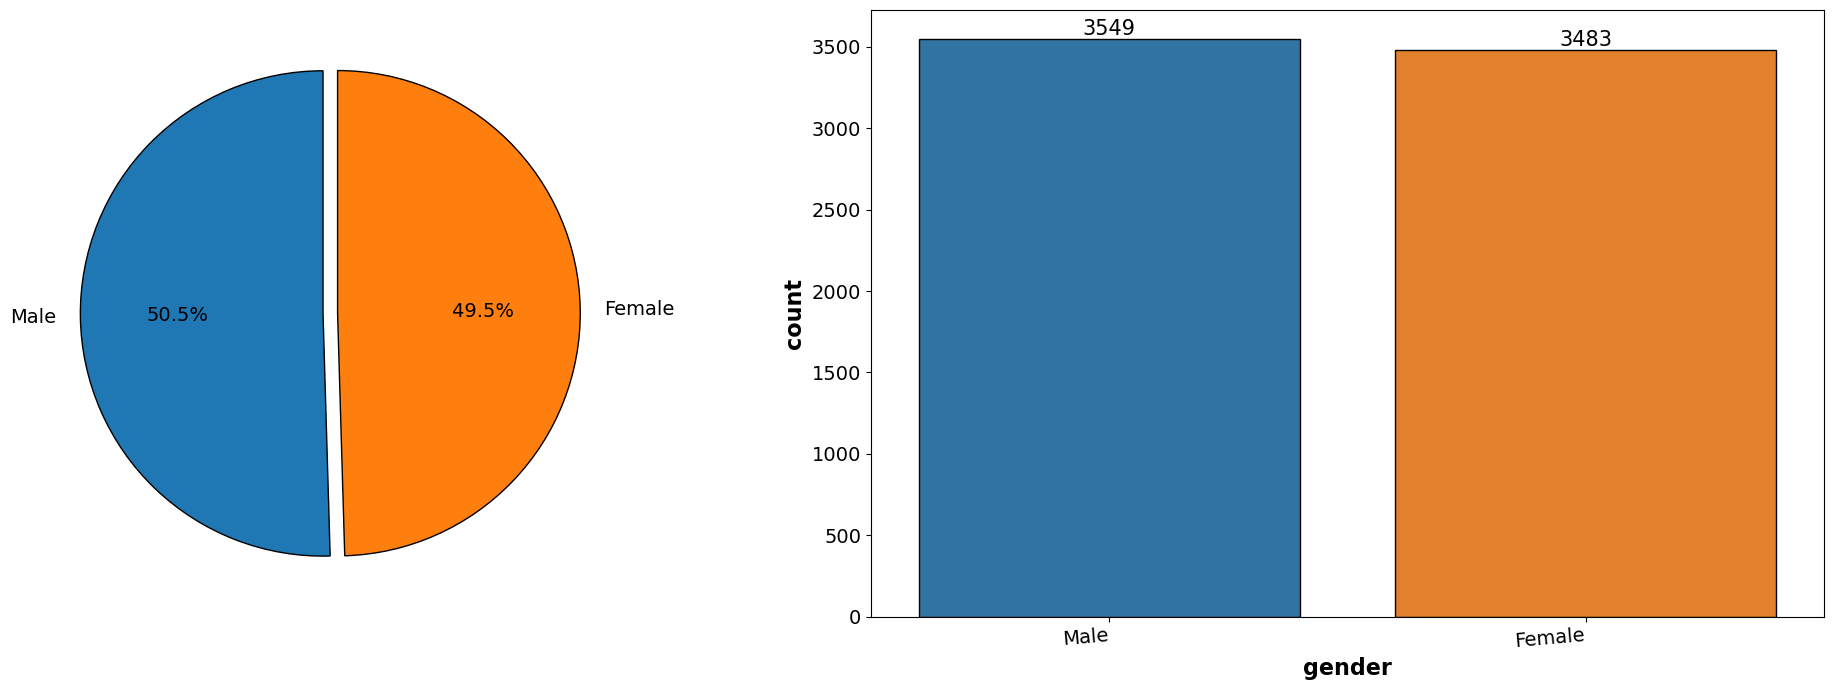

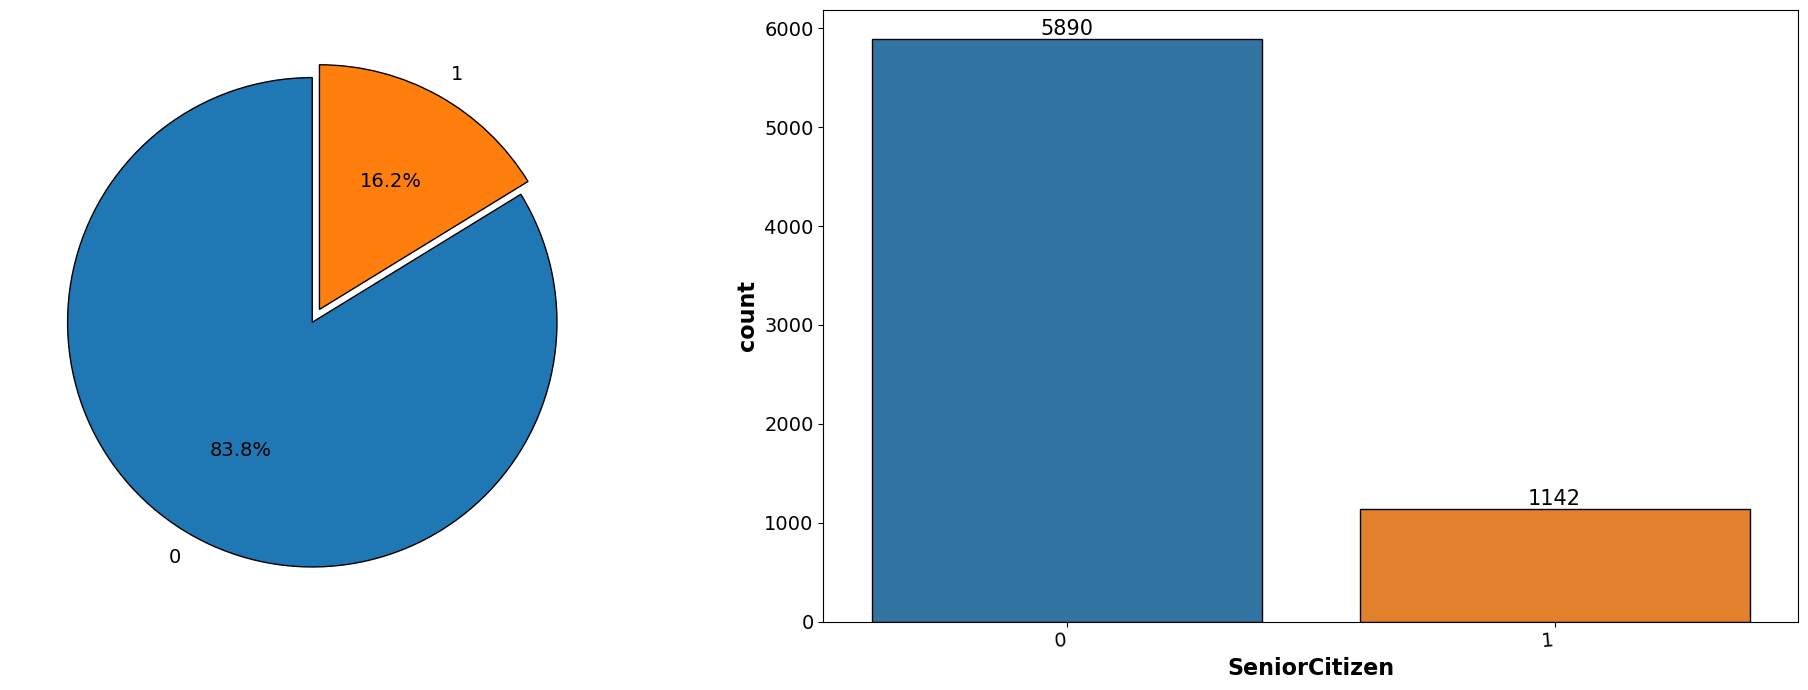

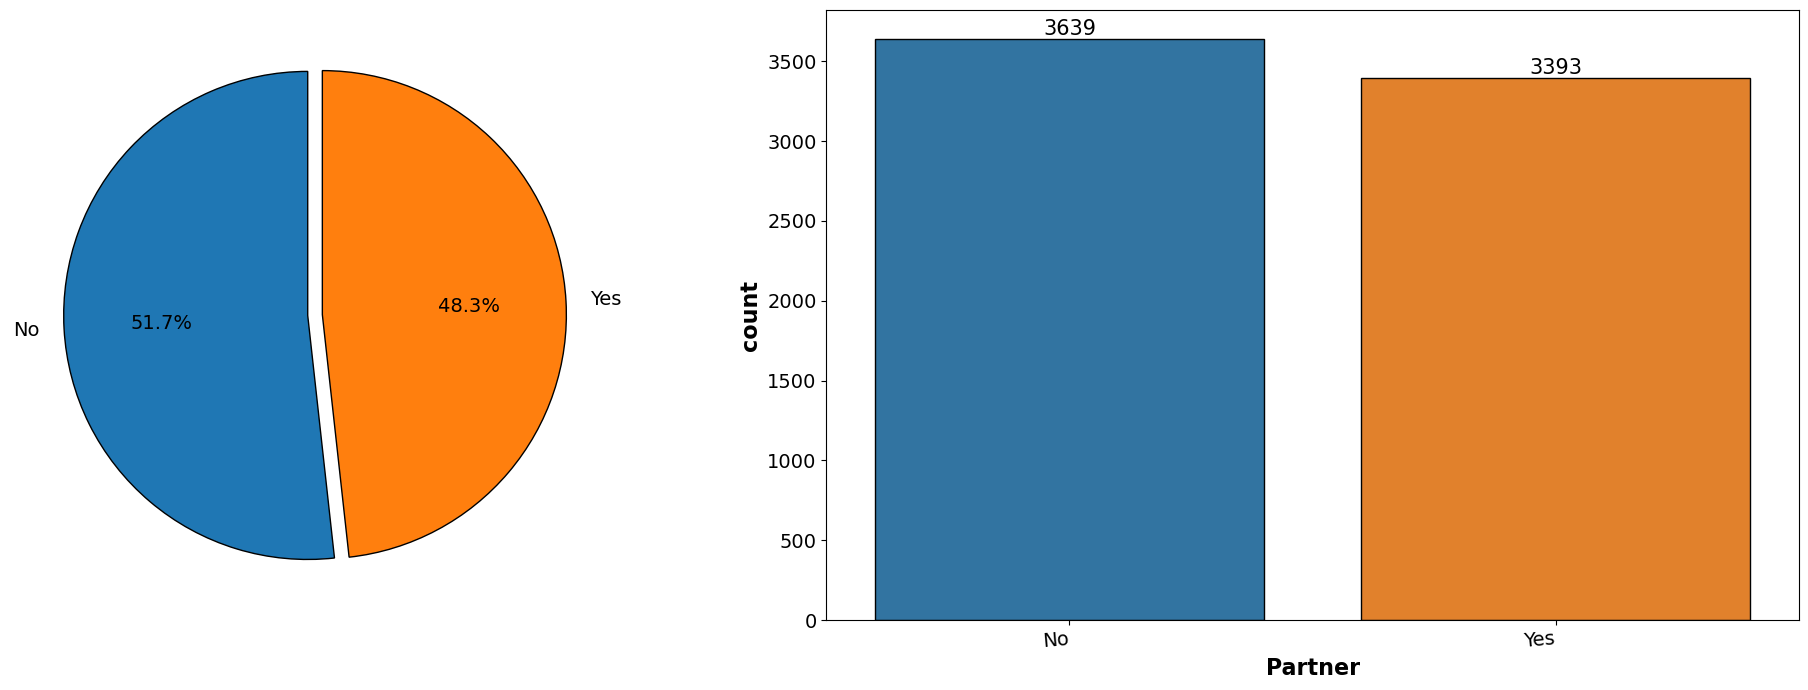

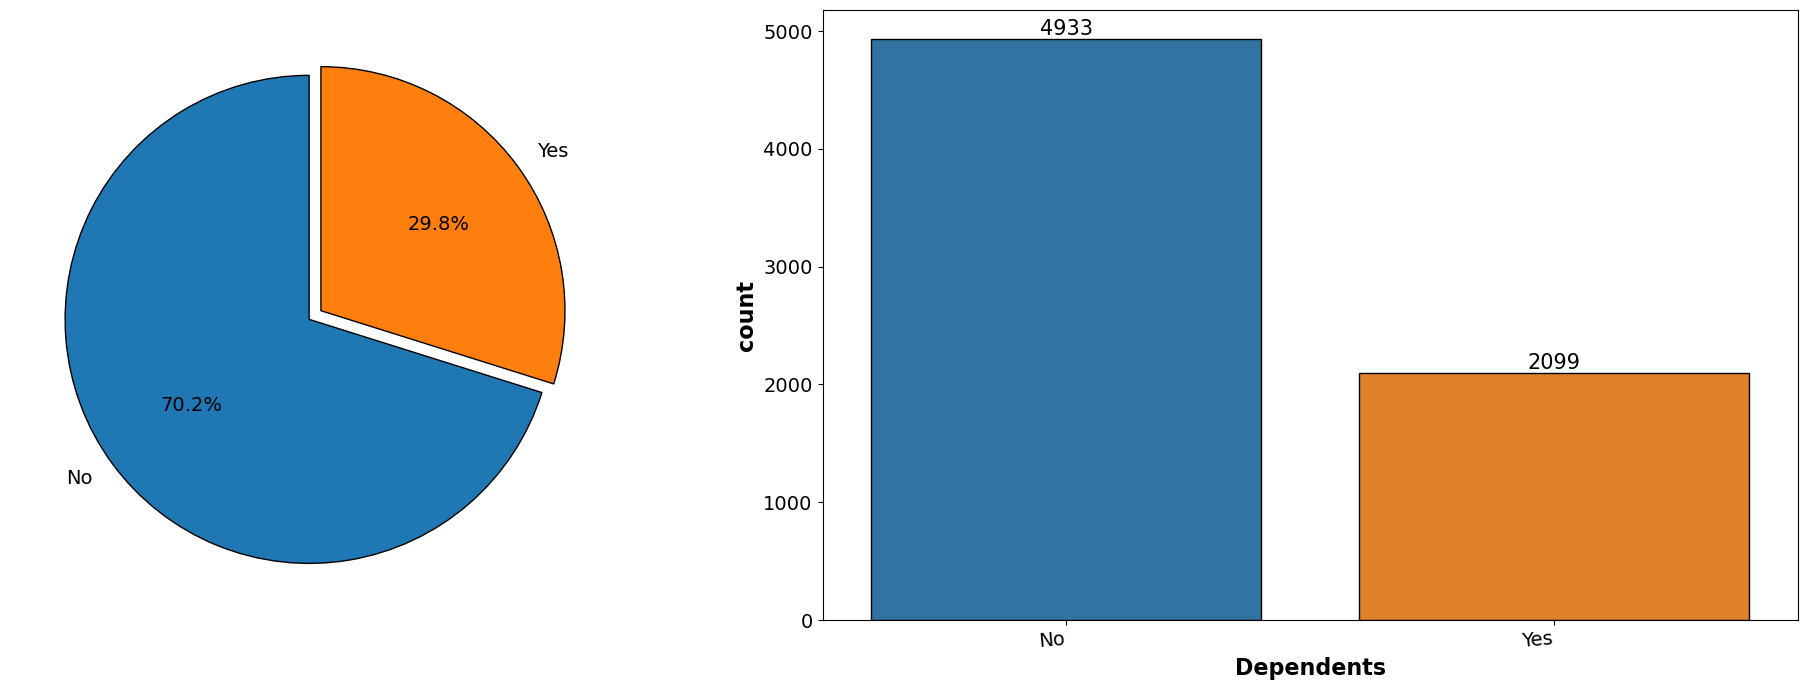

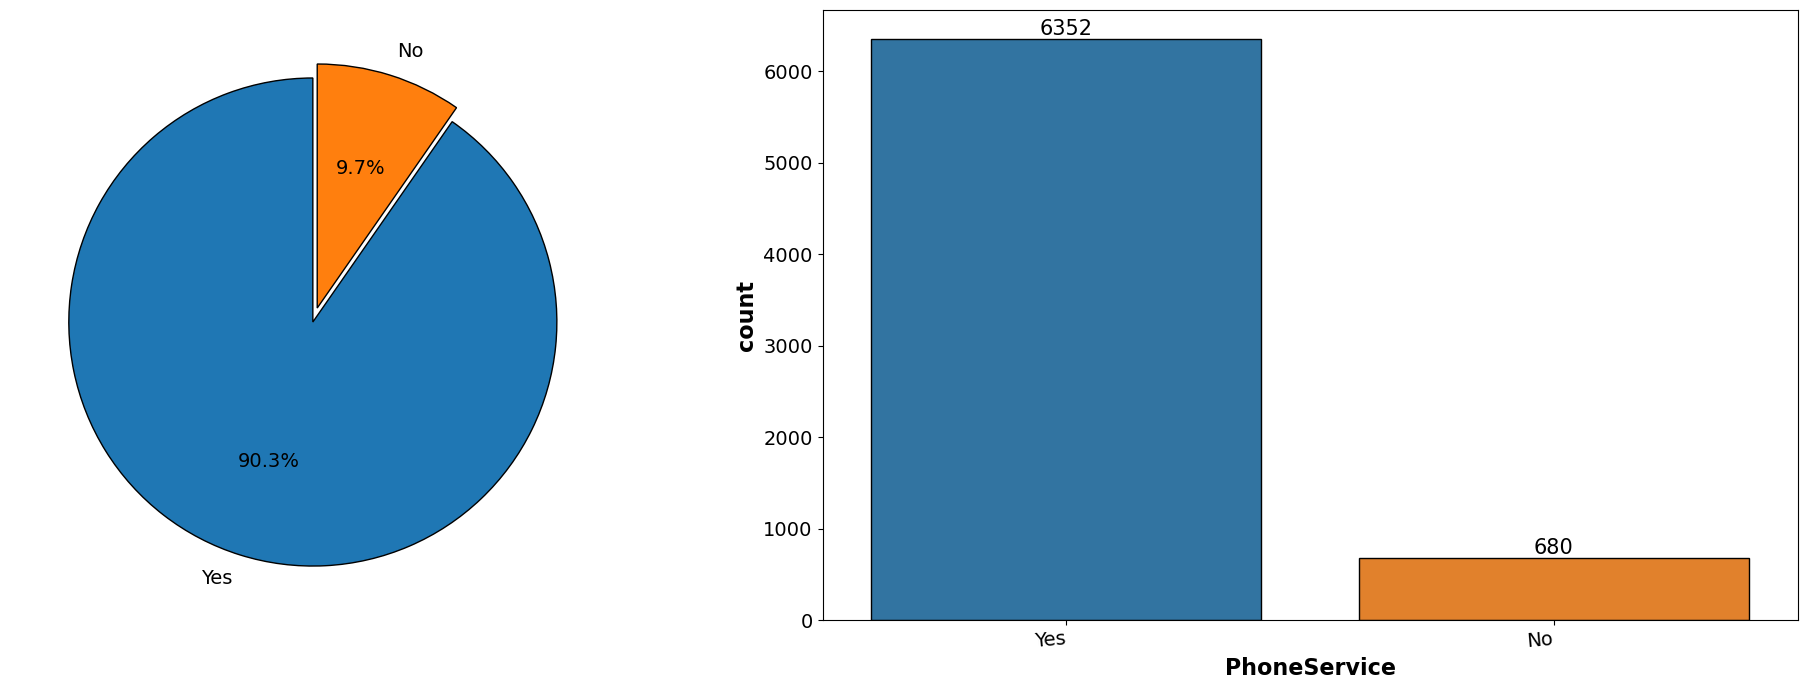

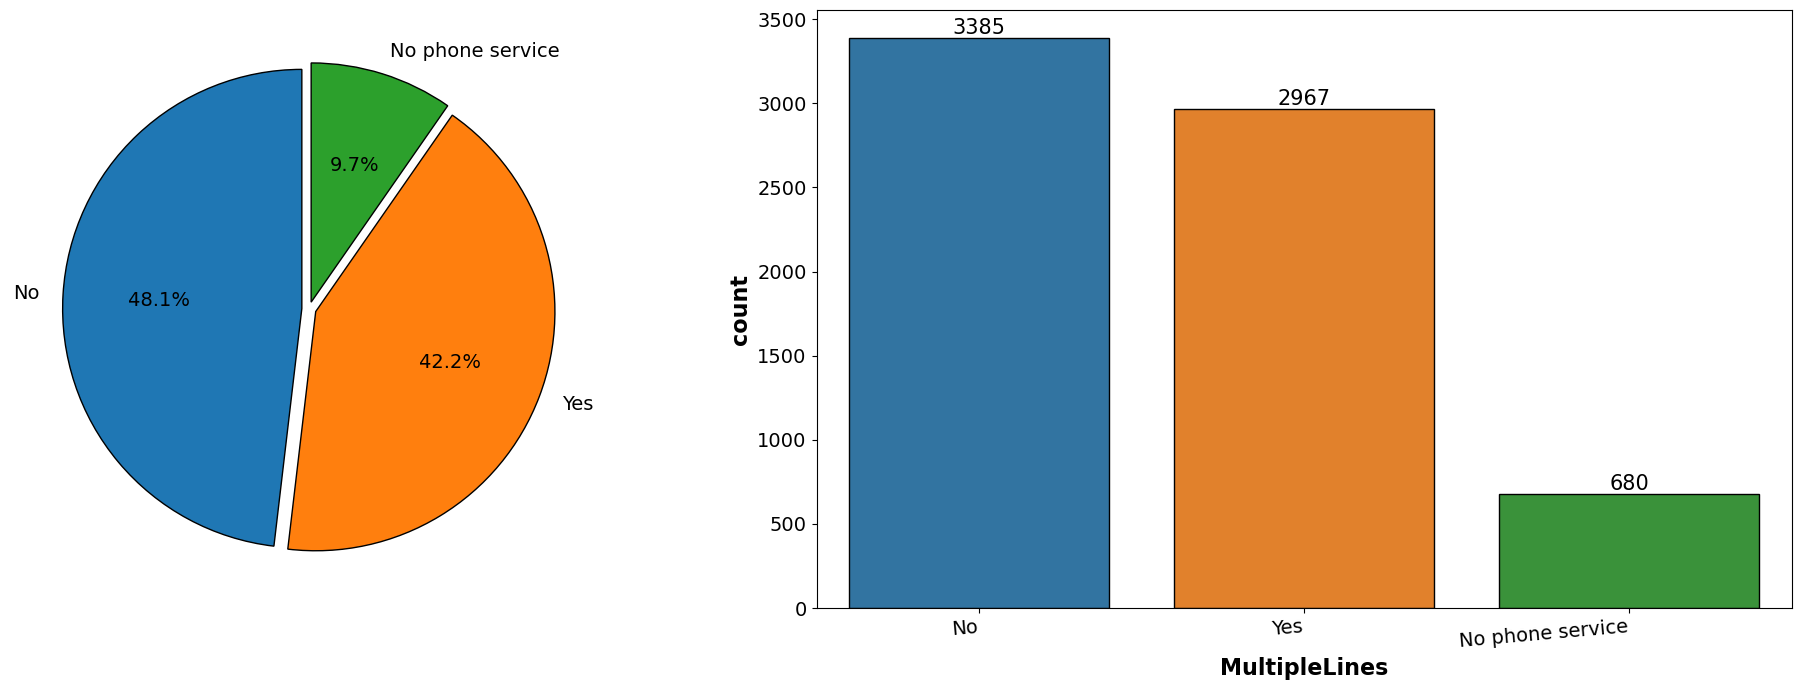

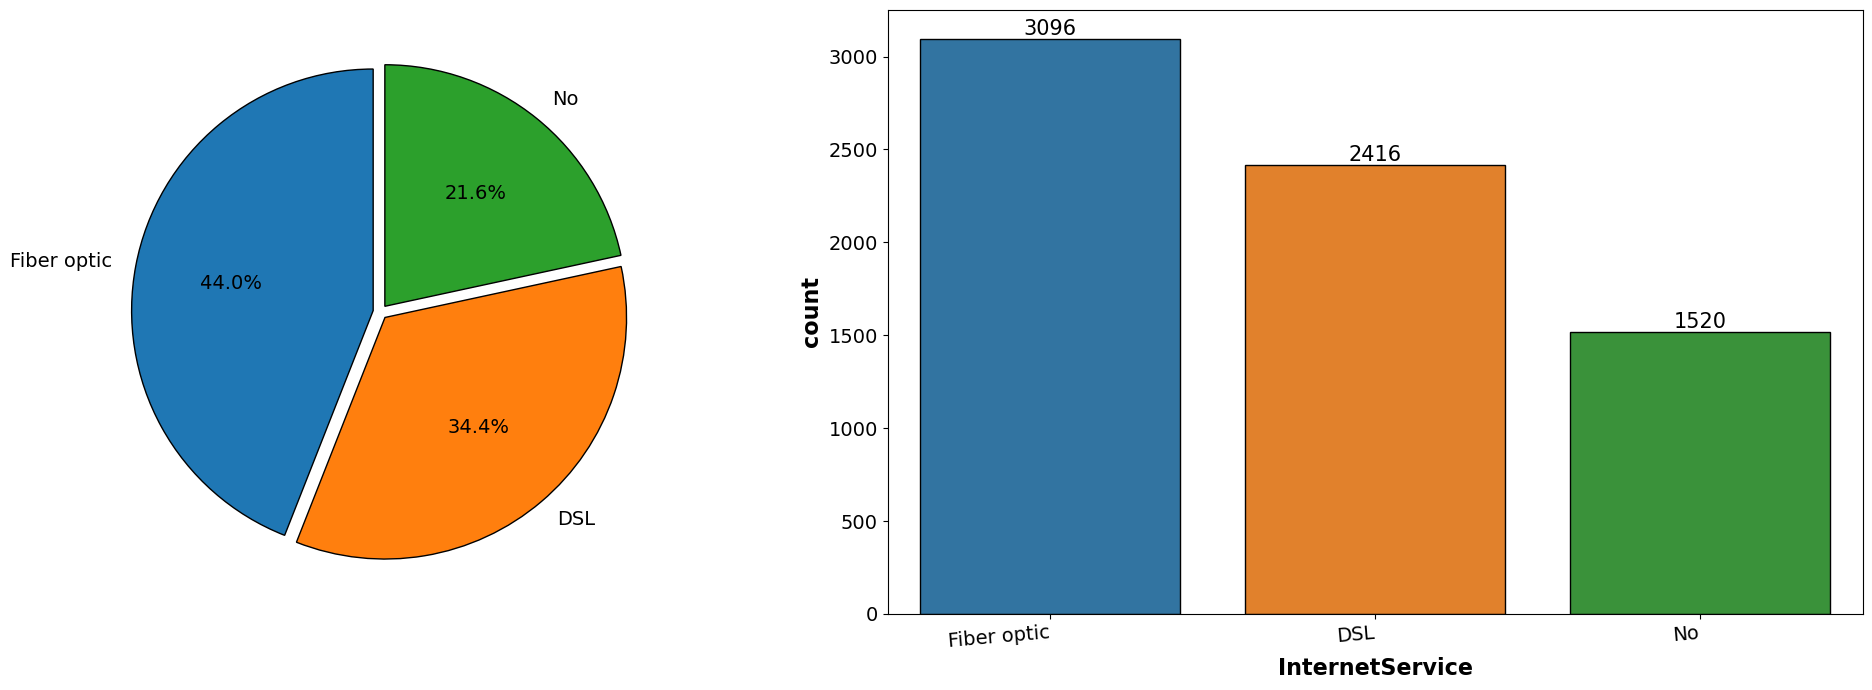

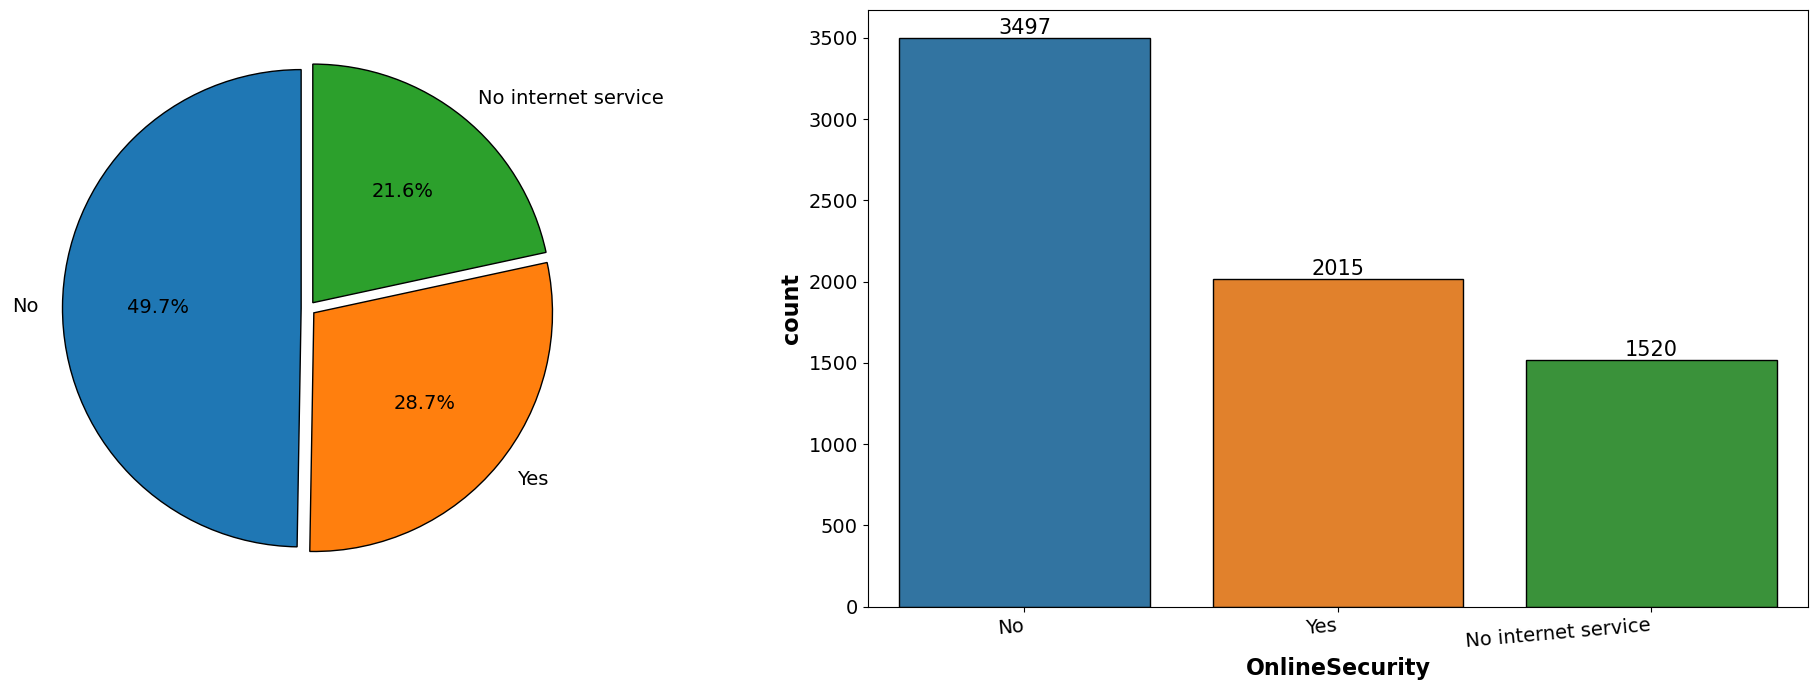

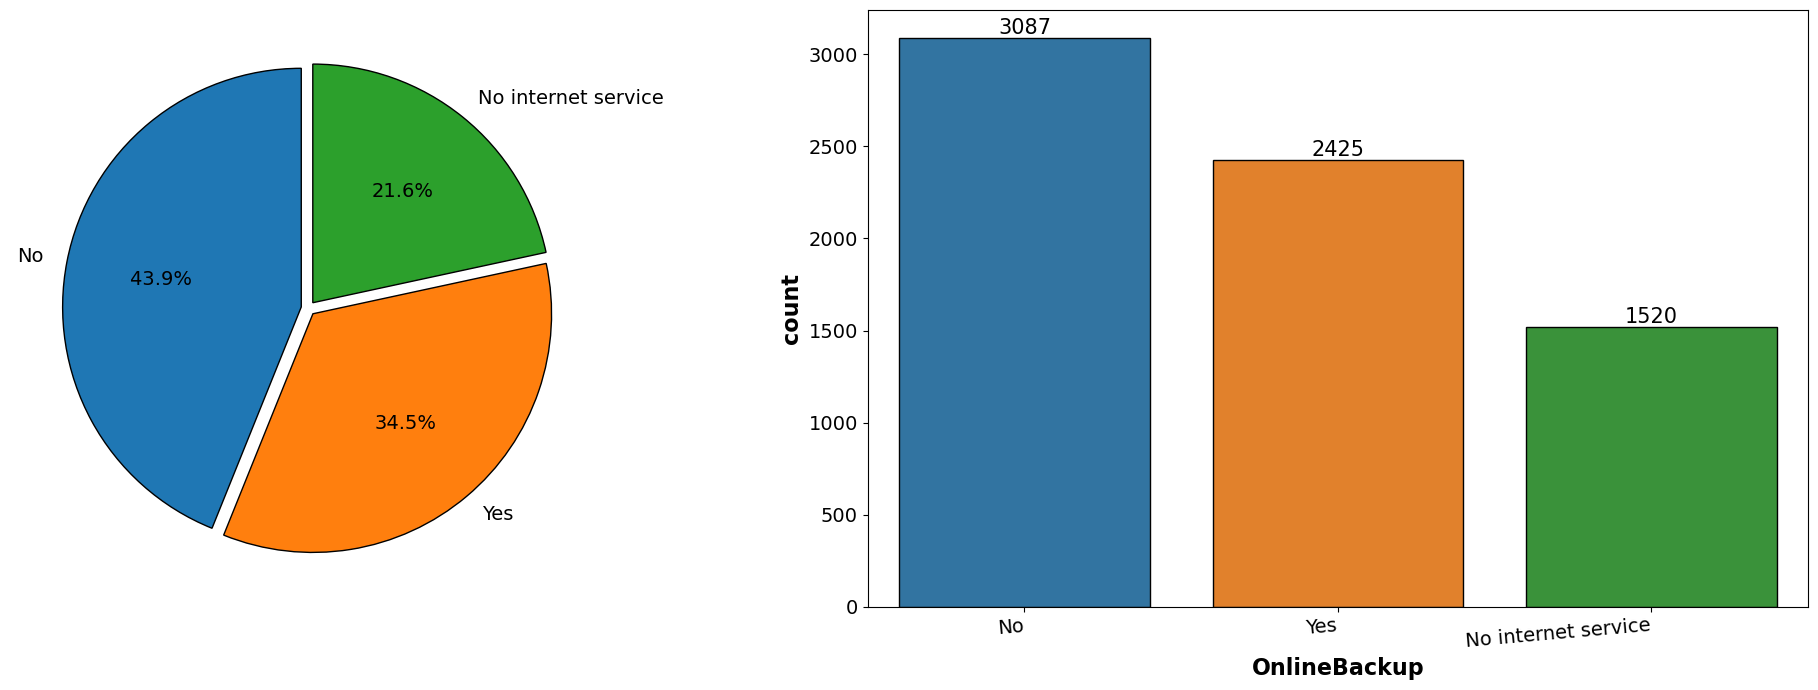

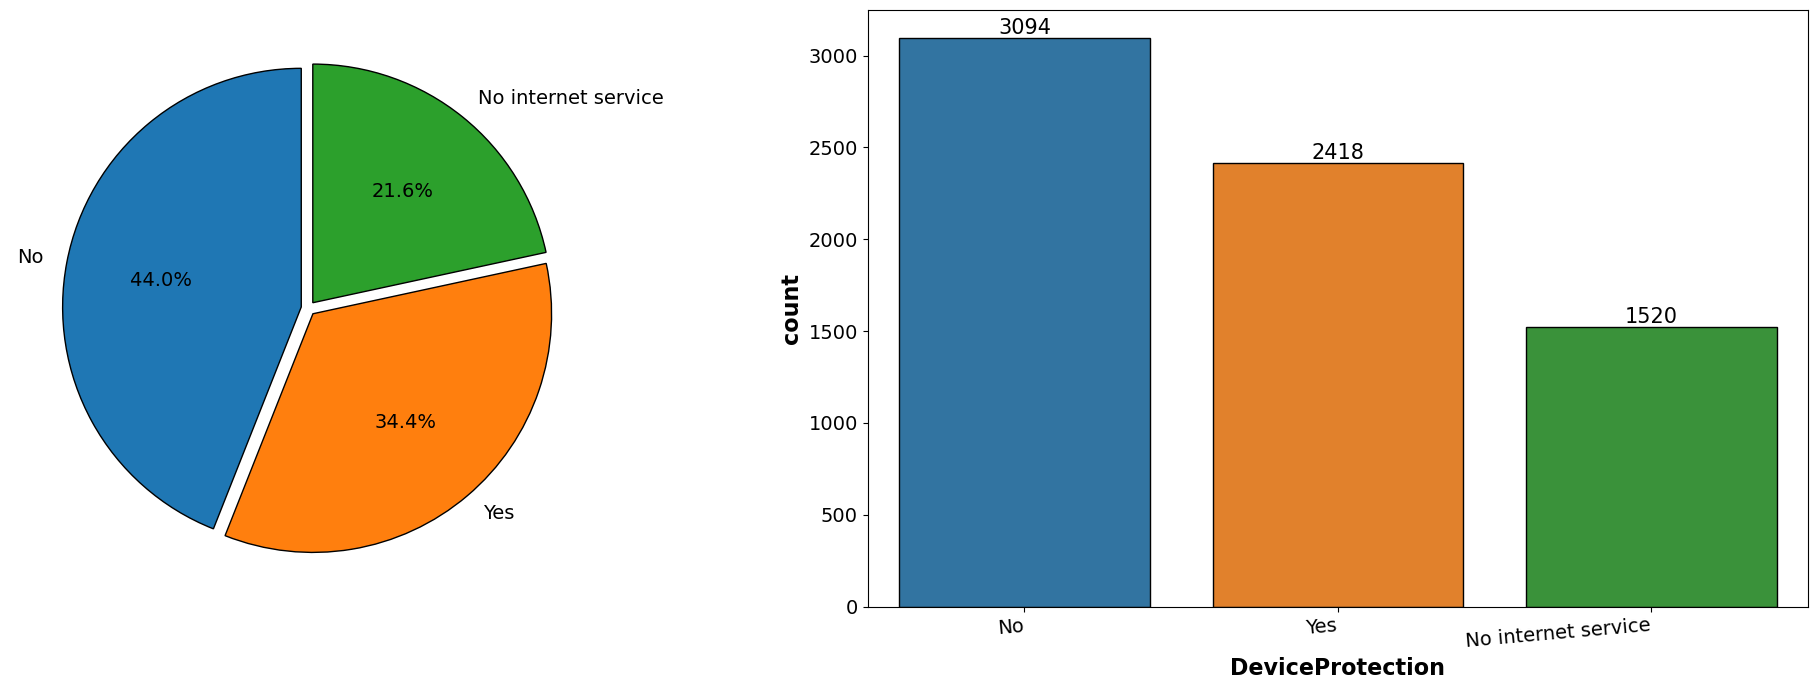

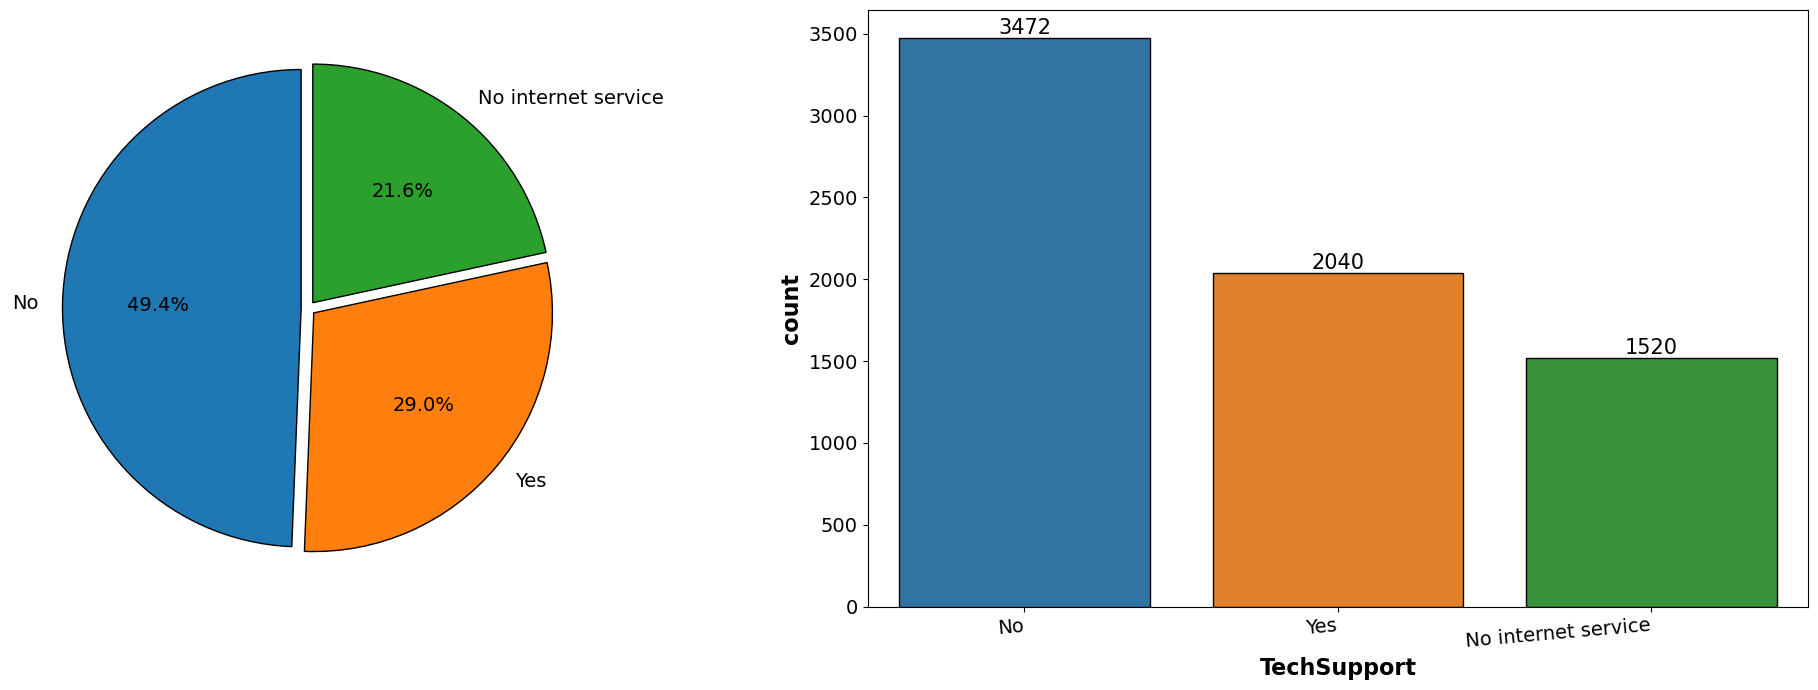

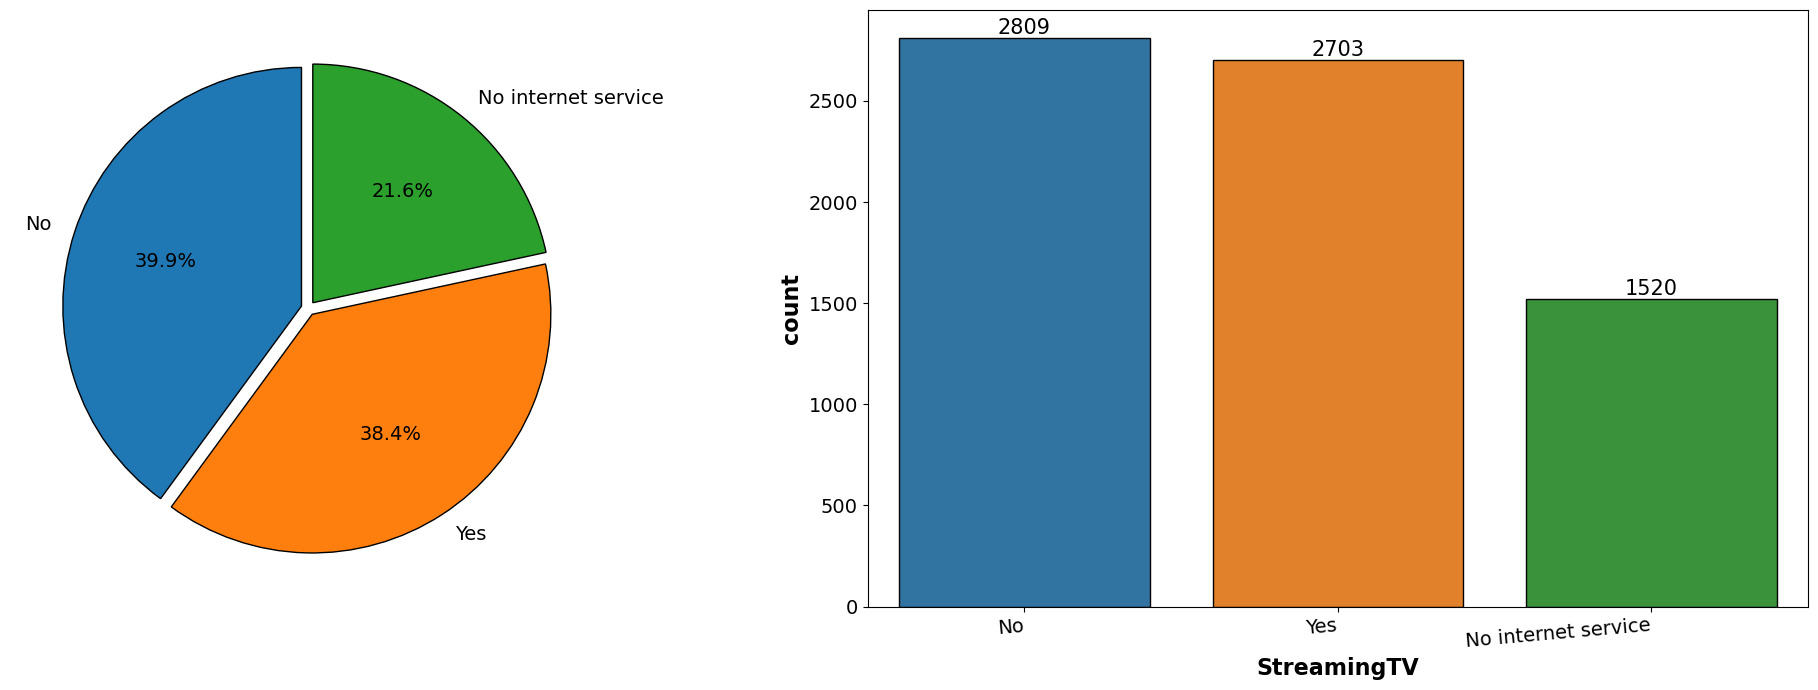

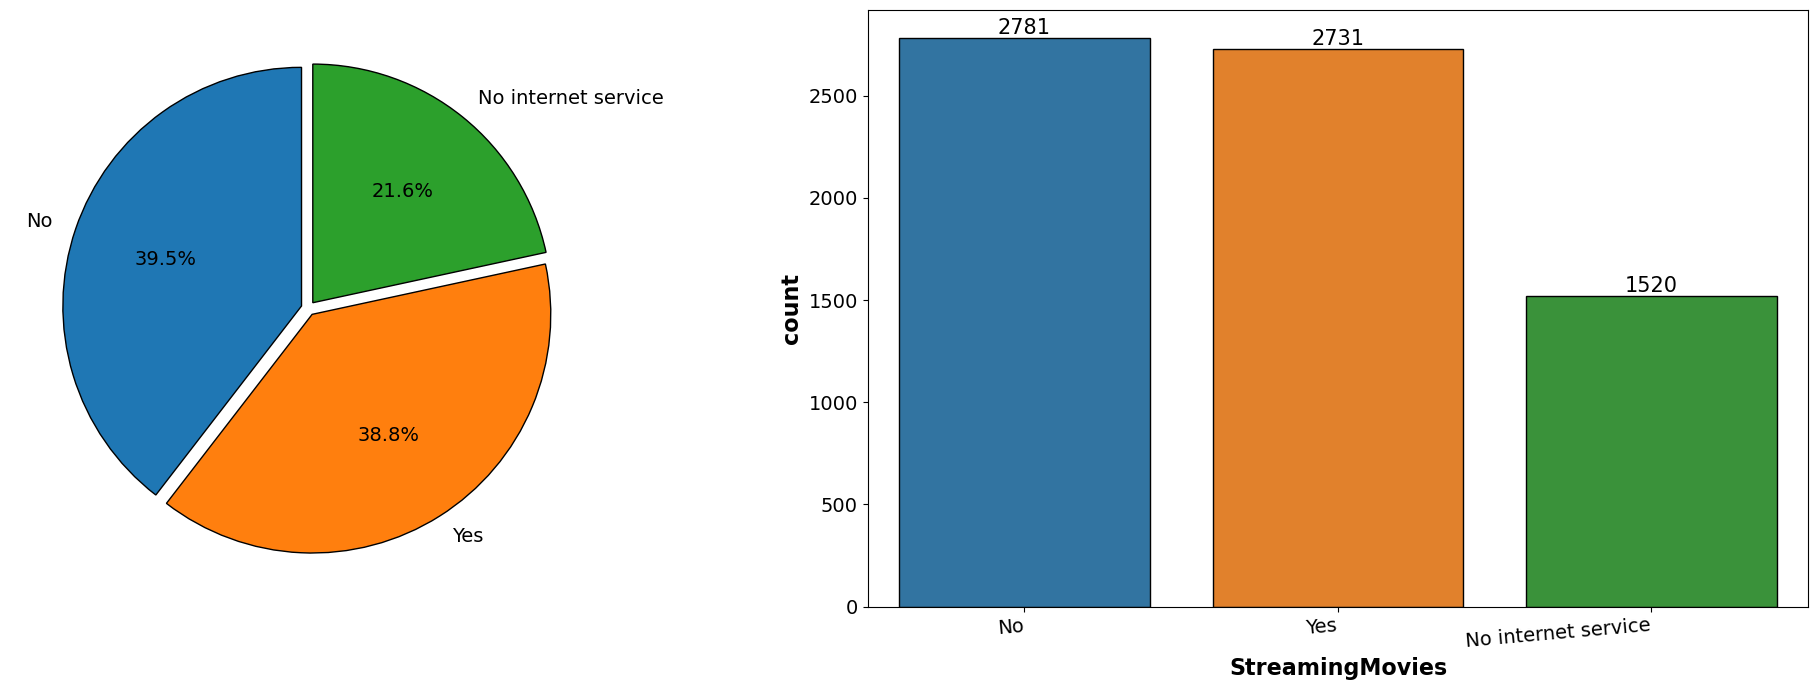

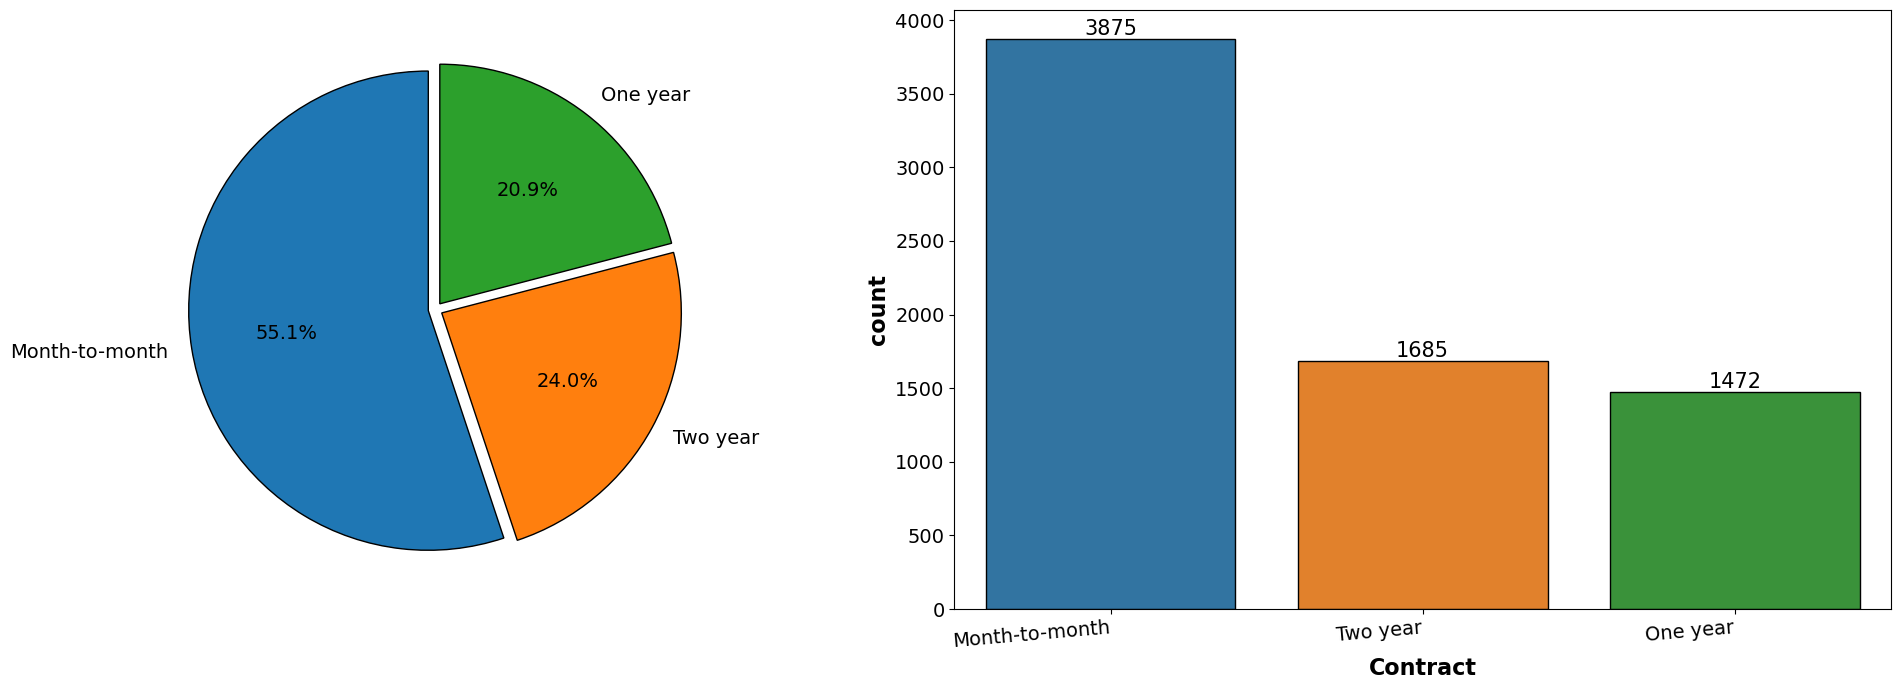

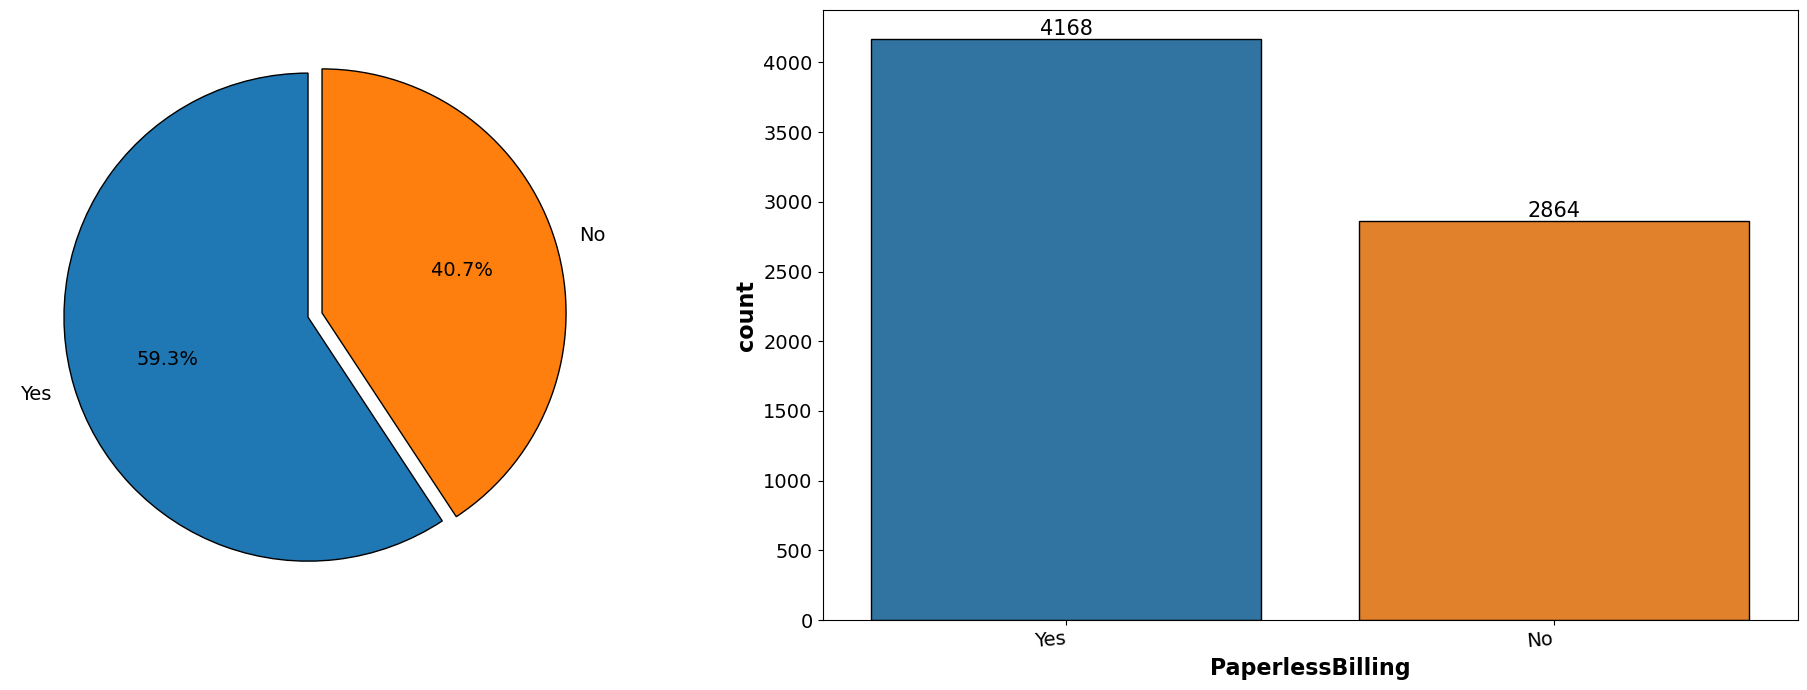

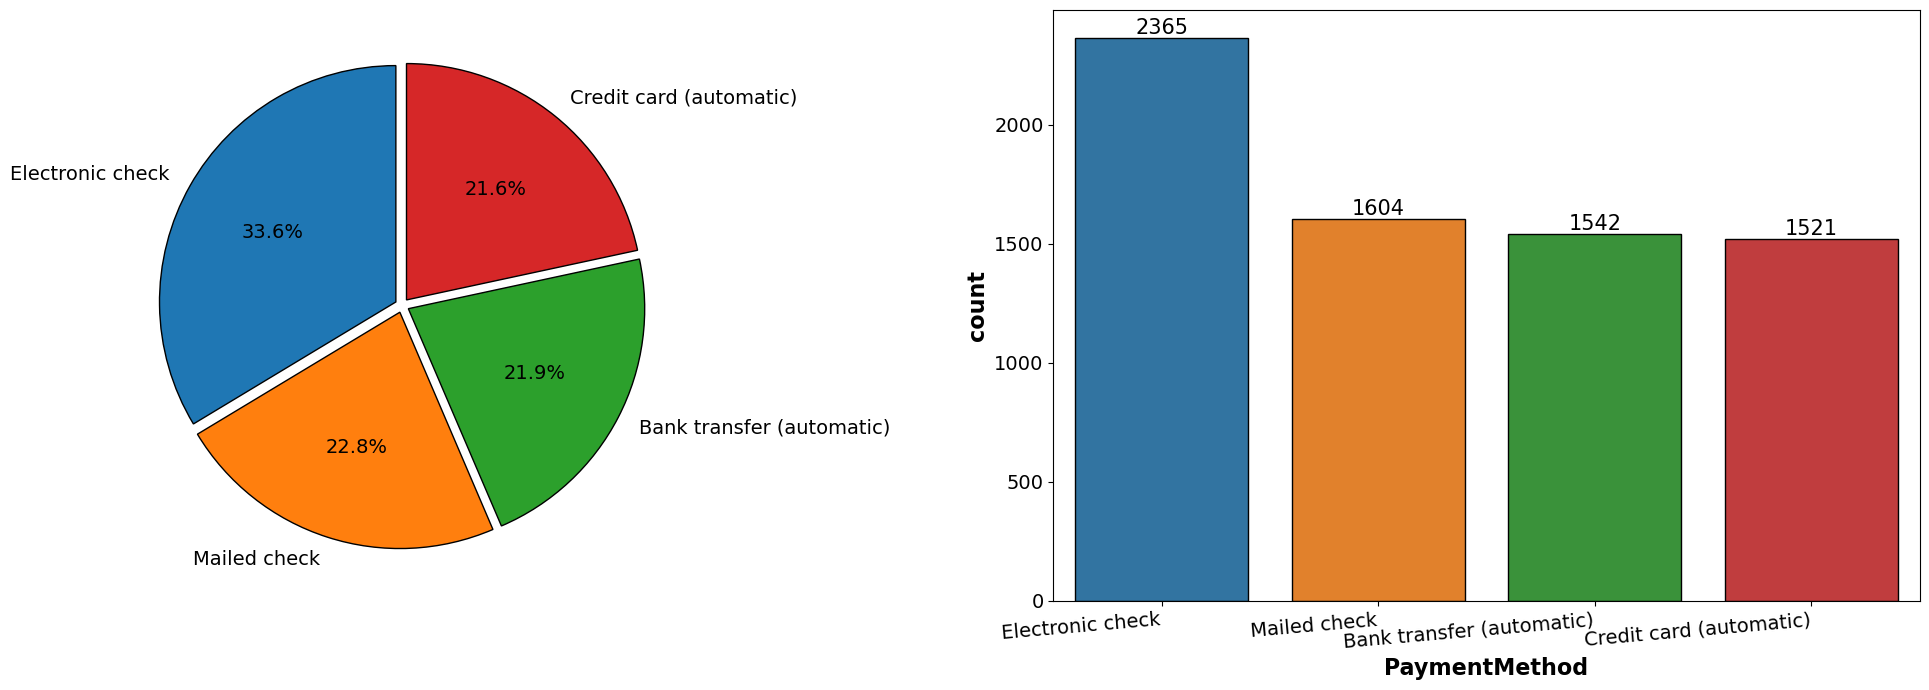

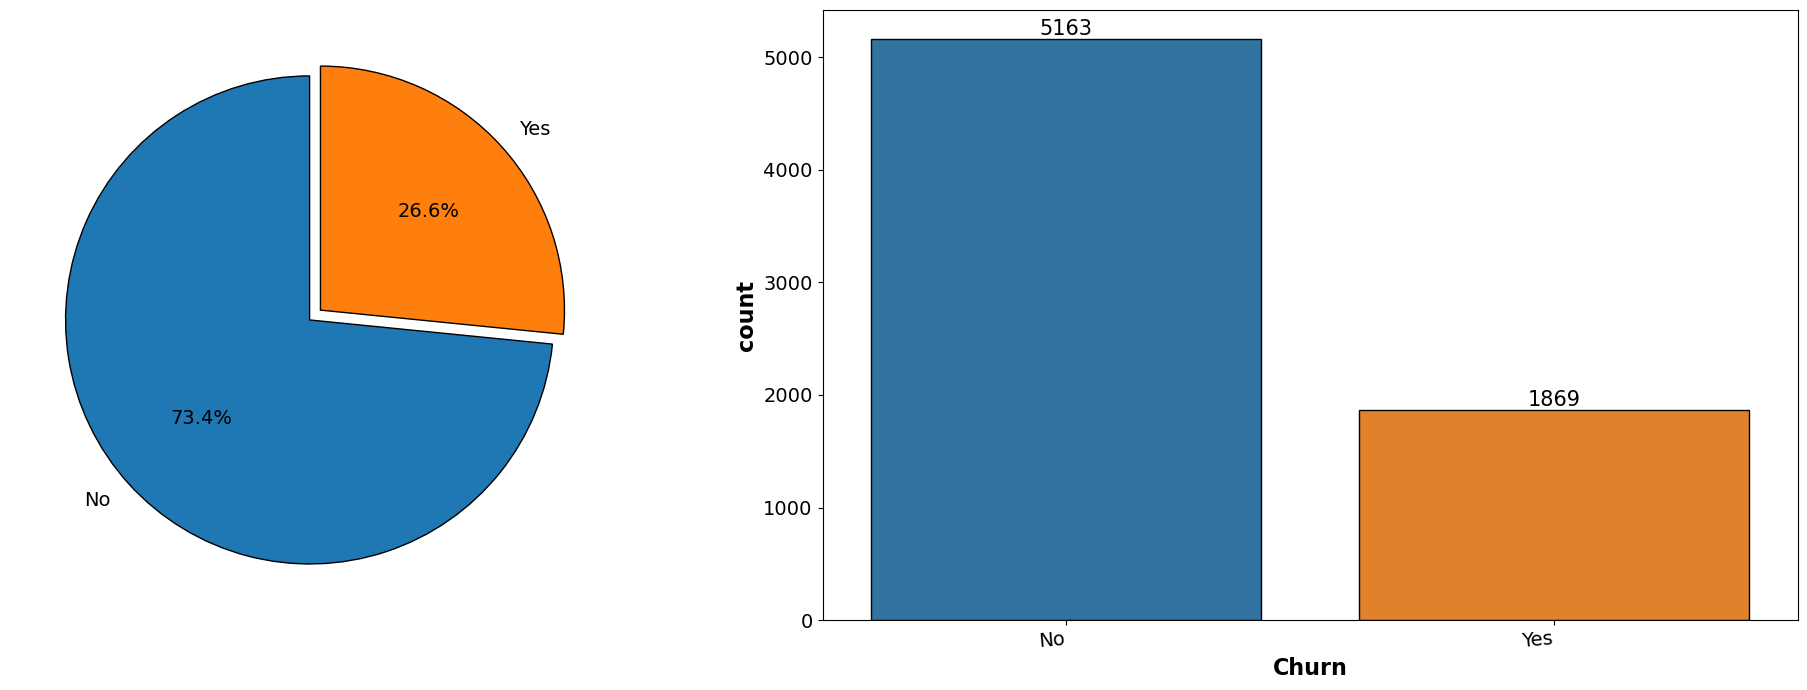

In [52]:
count_pie_plot(df2)

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

- The count of males and females in the dataset is almost same. So, there is no visible distinction between both the genders.
- 83.8% of the customers are NOT 'senior citizens'.
- 51.7% of the customers are NOT having 'partners'.
- 70.2% of the customers are NOT having 'dependents'.
- 90.3% of the customers are NOT having ‘phone service’.
- Most of the customers are using ‘Fibre Optic’ as 'internet service'.
- 49.7% of the customers DONOT have ‘online security’.
- 55.1% of the customers have opted for a ‘month-to-month’ contract.
- 59.3% of the customers have opted for ‘paperless billing’.


In [53]:
# Plotting histogram for numerical columns.

def hist_plot(df):
    
    list_cols = list(numerical_col)
    fig, ax1 = plt.subplots(nrows=1, ncols=len(numerical_col), figsize=(20,7))
    ax1 = ax1.flatten() 
    for i, col in enumerate(list_cols):    
        ax = sns.histplot(df[col], ax=ax1[i], kde = True, color = '#095899')
        #ax1[i].set_title(col, fontsize = 15, fontweight = 'bold')
        #ax.tick_params(axis='x', labelsize=16)  
        ax.set_xlabel(col, fontsize=16, fontweight = 'bold')
        ax.set_ylabel("Count", fontsize=16, fontweight = 'bold')
        ax.tick_params(axis='x', labelsize=16)
        ax.tick_params(axis='y', labelsize=16)
    plt.tight_layout()

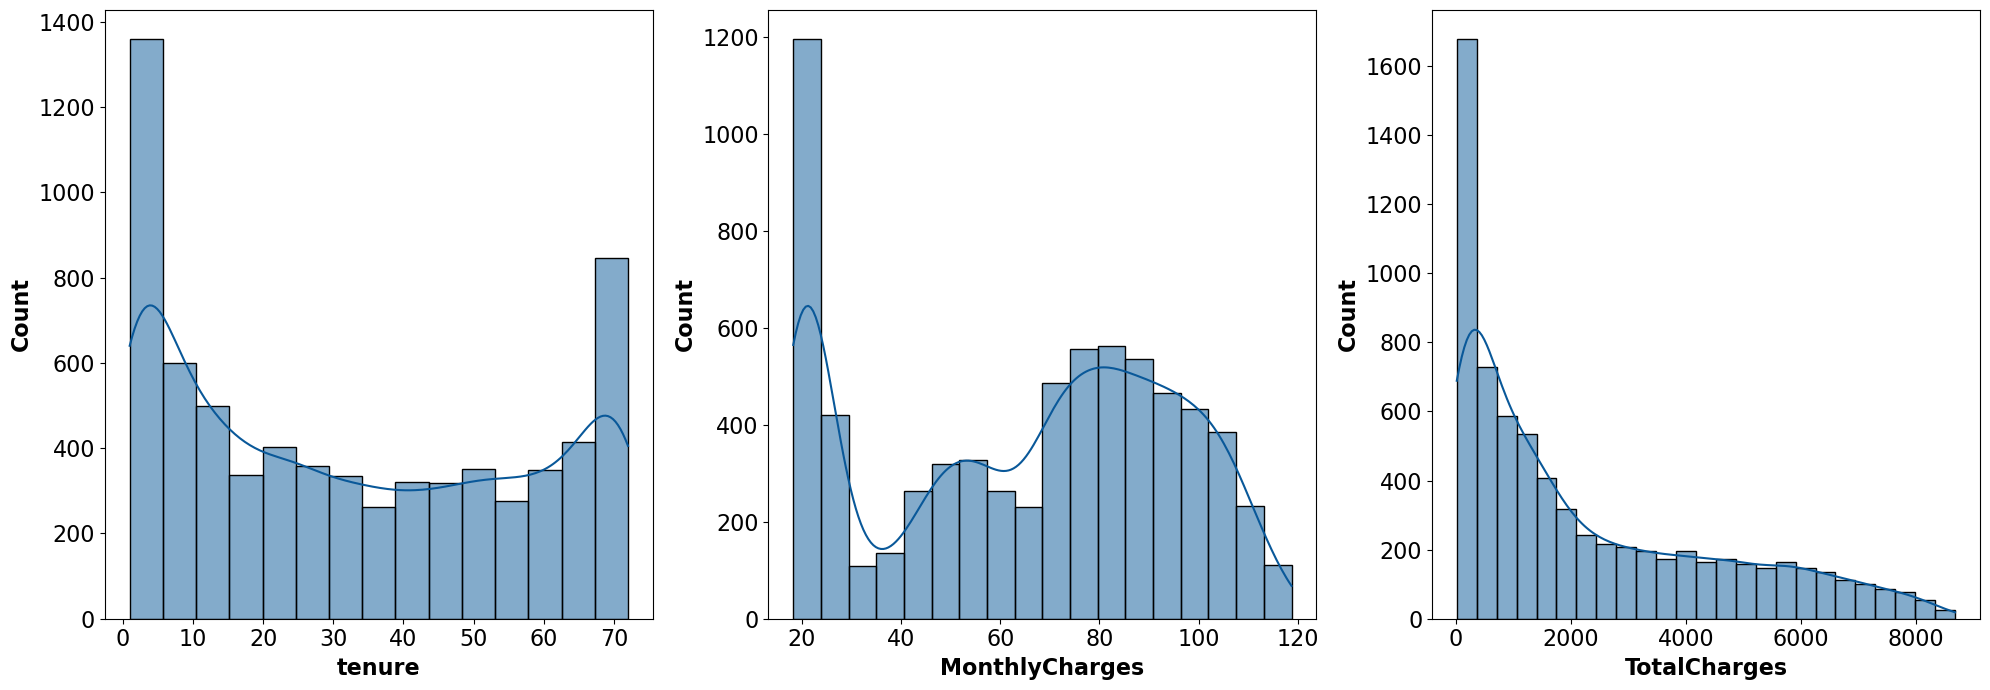

In [54]:
hist_plot(df2)

In [55]:
def box_plot(df):
    
    list_cols = list(numerical_col)
    fig, ax1 = plt.subplots(nrows=1, ncols=3, figsize=(20,7))
    ax1 = ax1.flatten() 
    for i, col in enumerate(list_cols):    
        ax = sns.boxplot(df[col], ax=ax1[i],  orient='h')
        ax1[i].set_title(col, fontsize = 15, fontweight = 'bold')
        ax.tick_params(axis='x', labelsize=16)          
    plt.tight_layout()
         

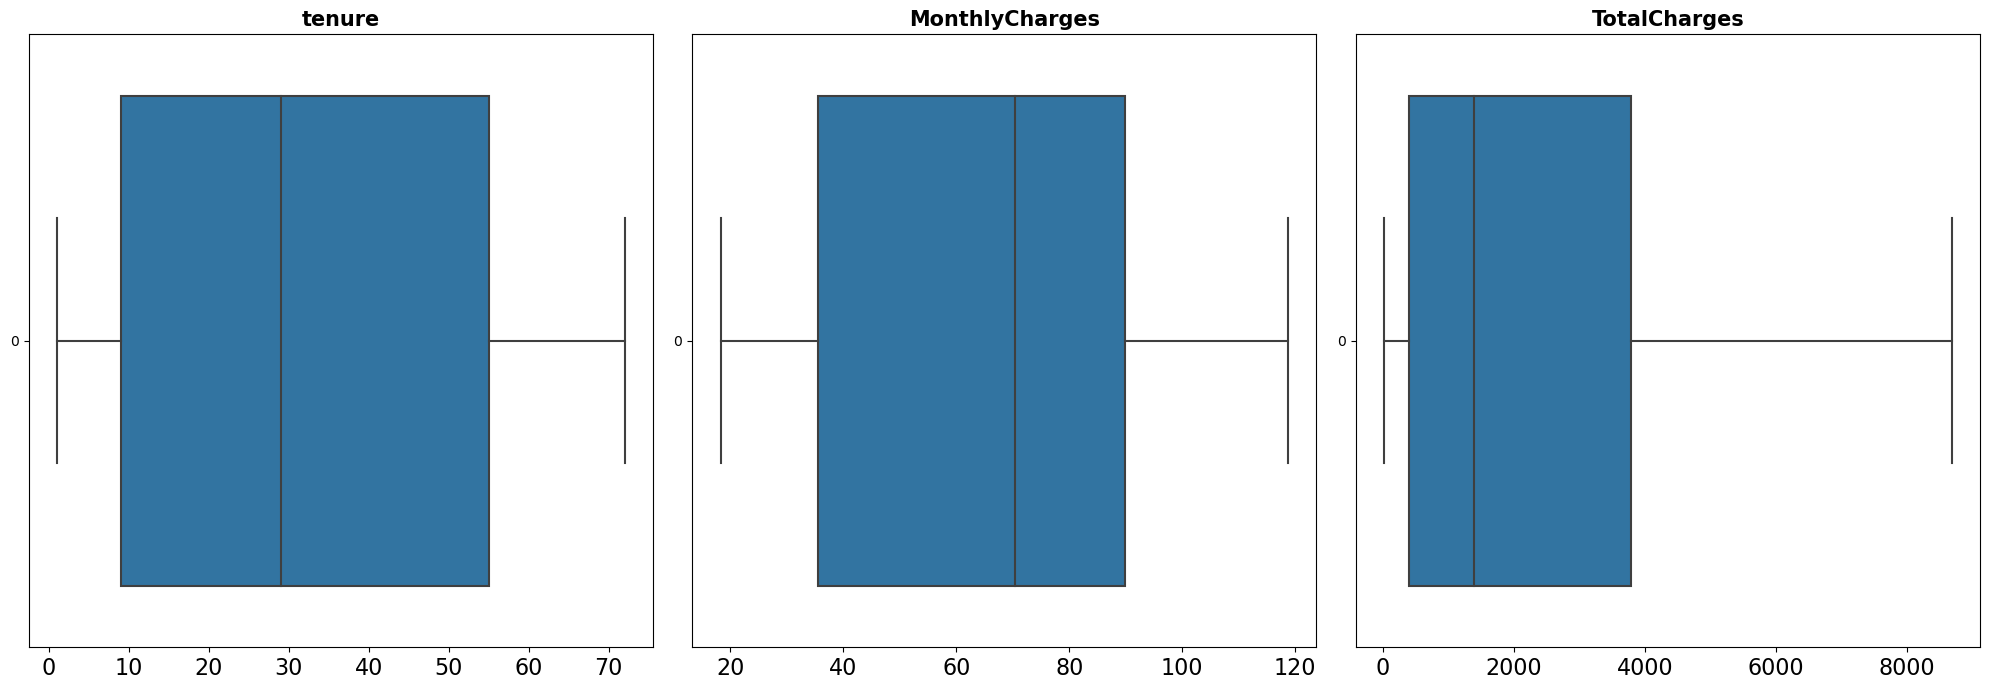

In [56]:
box_plot(df2)

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

- None of the plots show a 'normal distribution'.
- 'Total charges' is rightly skewed.

### 2.  BIVARIATE ANALYSIS

In [57]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   int64  
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   int64  
 3   Dependents        7032 non-null   int64  
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   int64  
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   int64  
 16  PaymentMethod     7032 non-null   object 


In [58]:
unique_values_count_1(df2)

[6530, 1584, 72, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2]

In [59]:
def count_pie__hue_plot(df):
    list_cols = list(categorical_col)
    for col in list_cols: 
        if len(df[col].unique()) <= 4:
            feat = col
            hue = 'Churn'
            hue_type = df[hue].dtype.type
            if col != hue:  
                fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, figsize=(20,7))
                ax1.pie(df[feat].value_counts().values, labels=df[feat].value_counts().index, startangle= 90, explode= (0.03,)*len(df[feat].unique()), autopct='%1.1f%%', textprops ={'fontsize': 14}, wedgeprops={'edgecolor':'black'})


                groups = df[feat].unique()

                proportions = df.groupby(feat)[hue].value_counts(normalize=True)

                ax = sns.countplot(ax=ax2, x=feat, hue=hue, data=df)#, , order = df[col].value_counts().index))
                ax.set_xlabel(col, fontsize=16,fontweight = 'bold')
                ax.set_ylabel('count', fontsize=16,fontweight = 'bold')


                for c in ax.containers:
                    labels = [f'{proportions.loc[g, hue_type(c.get_label())]:.1%}' for g in groups]
                    ax.bar_label(c, labels, fontsize = 15)
                ax.set_xticklabels(ax.get_xticklabels(), rotation= 5, horizontalalignment='right')  # rotation = 45,   
                plt.xticks(fontsize= 14)
                plt.yticks(fontsize= 14)
                plt.legend(title= 'Churn', prop ={"size": 14})
                plt.setp(ax.get_legend().get_title(), fontsize ='15')
                plt.tight_layout()

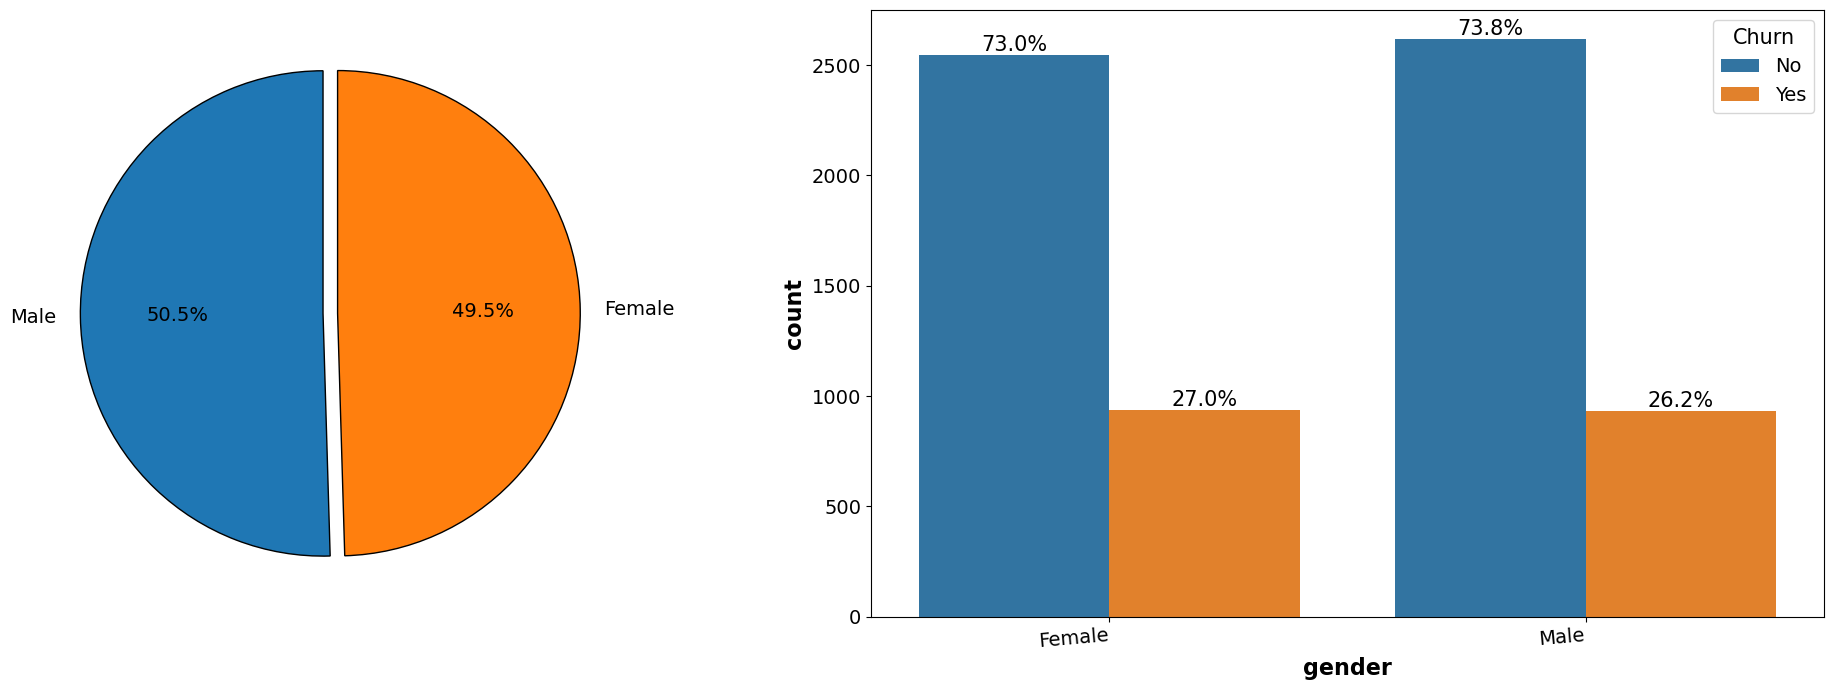

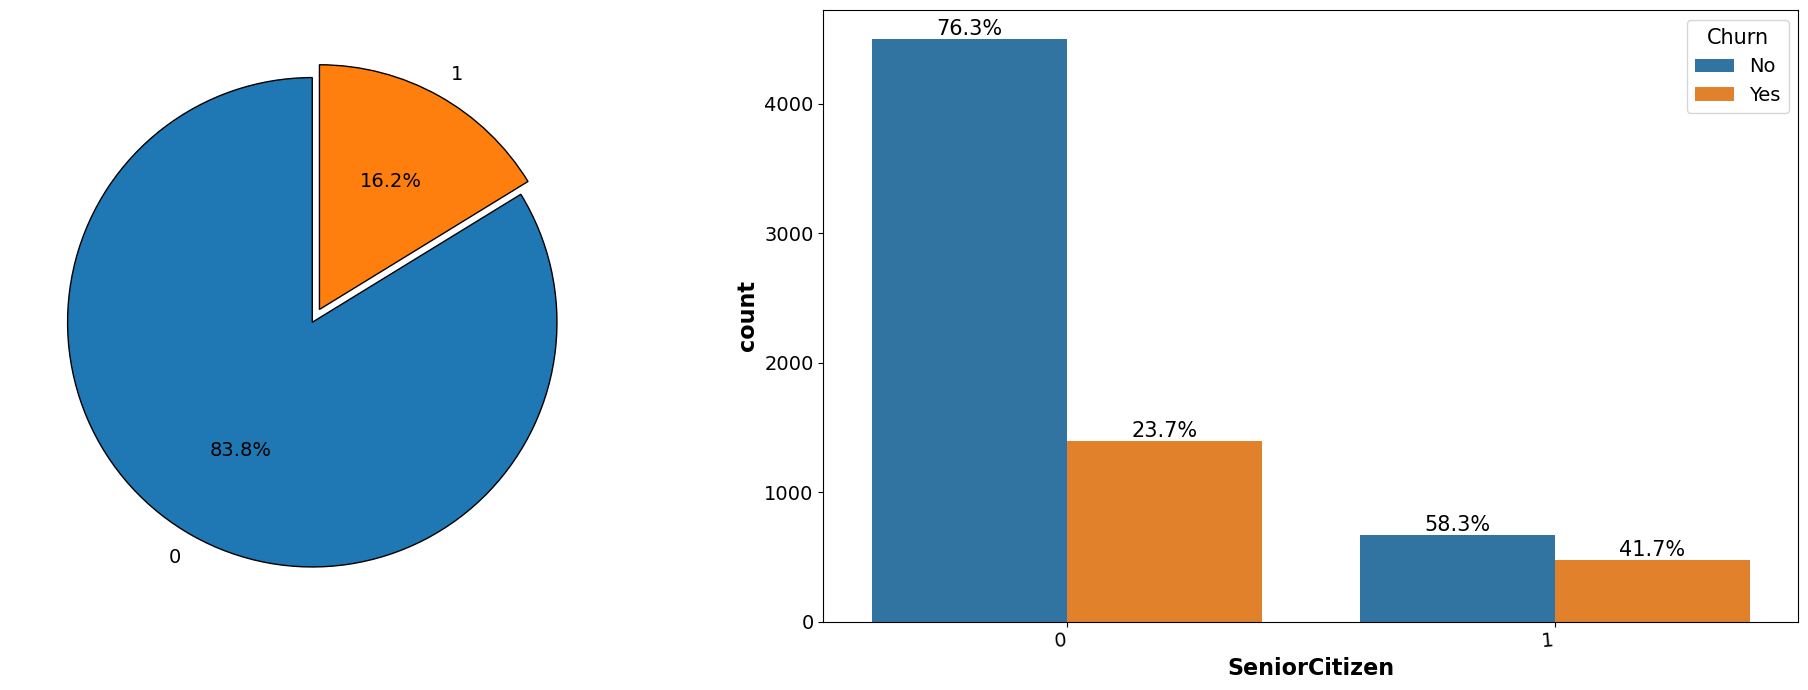

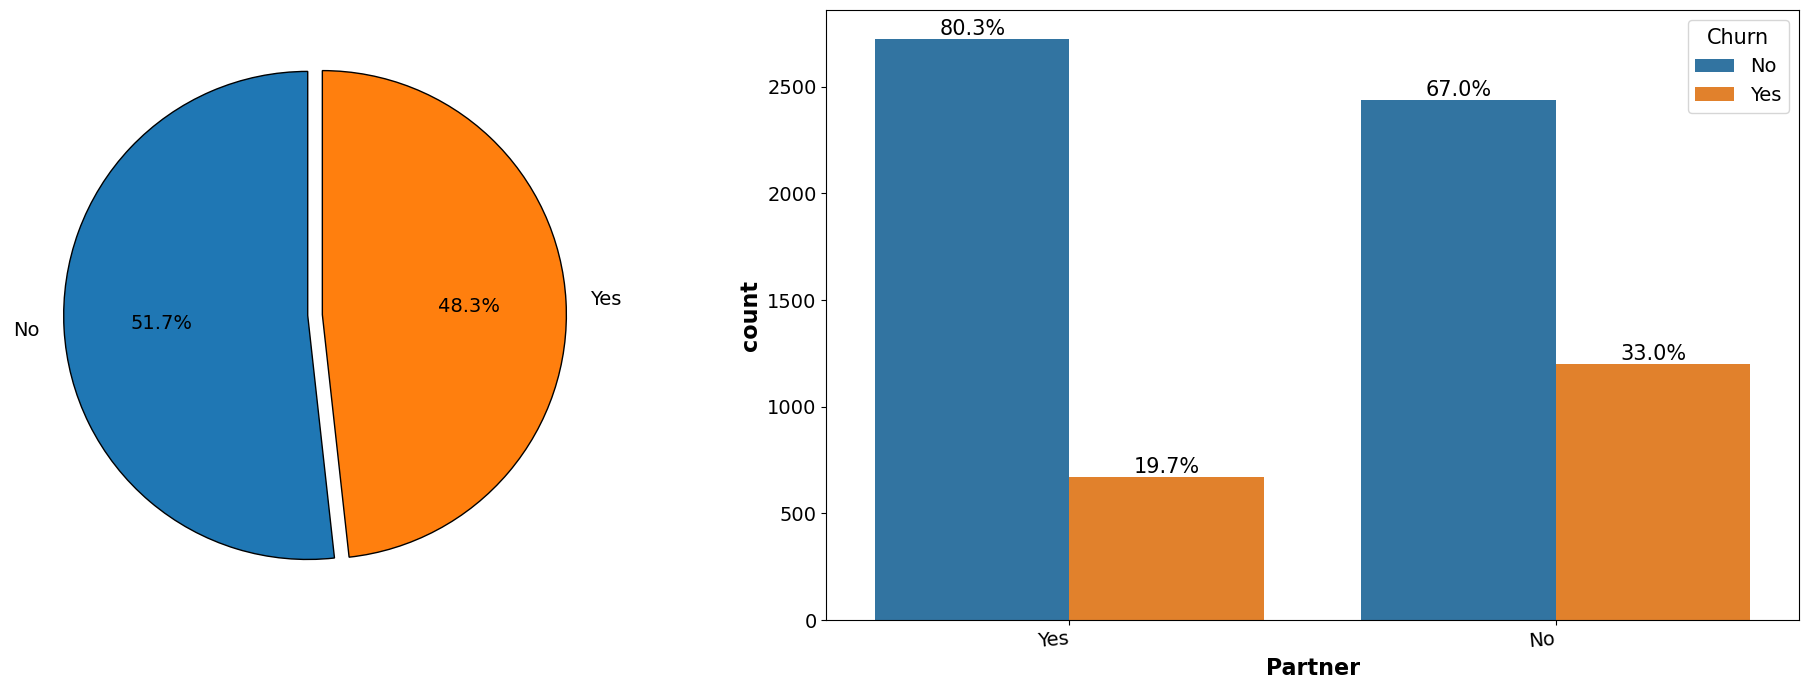

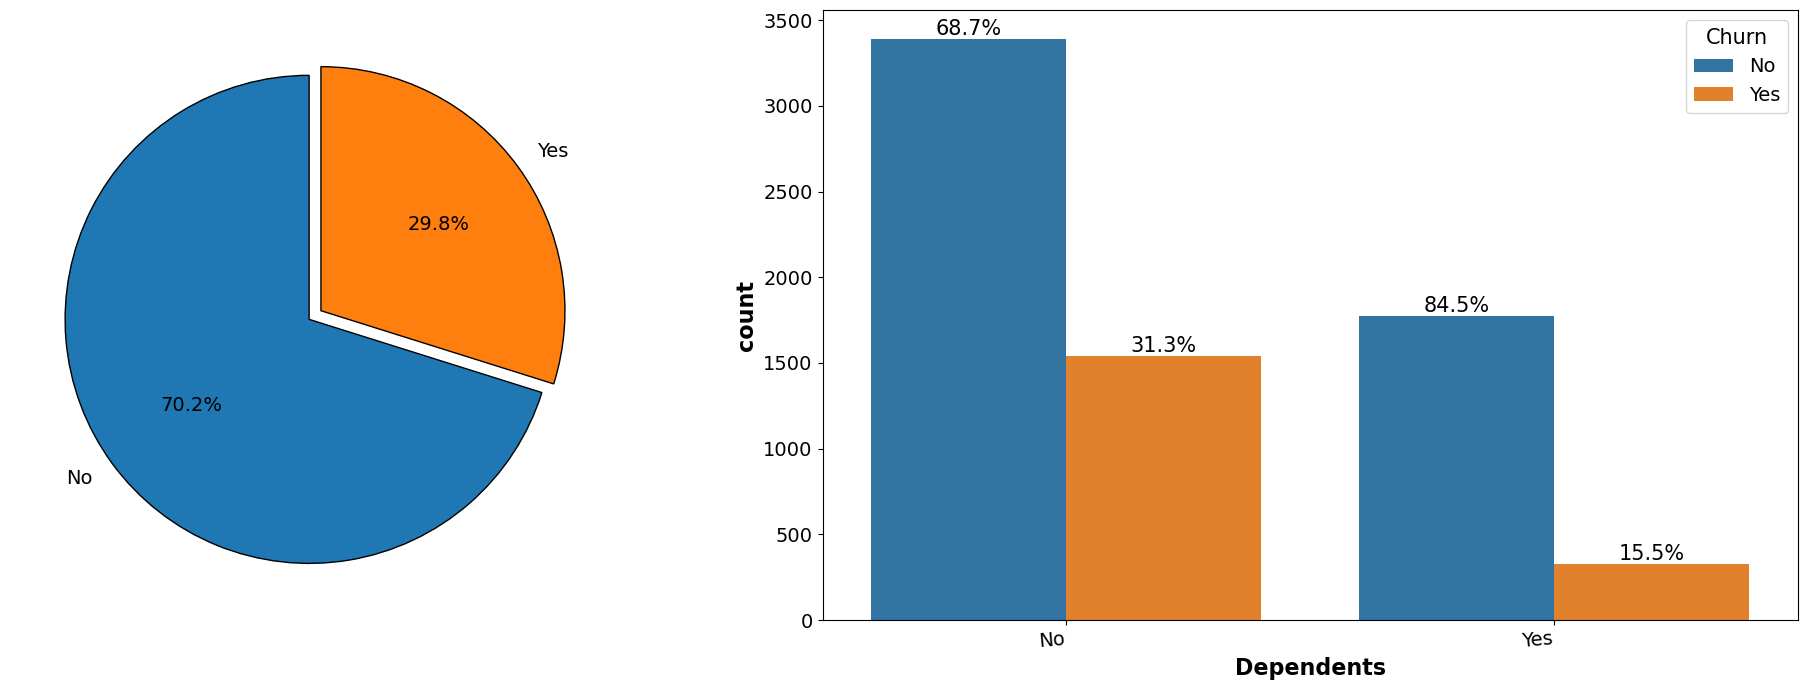

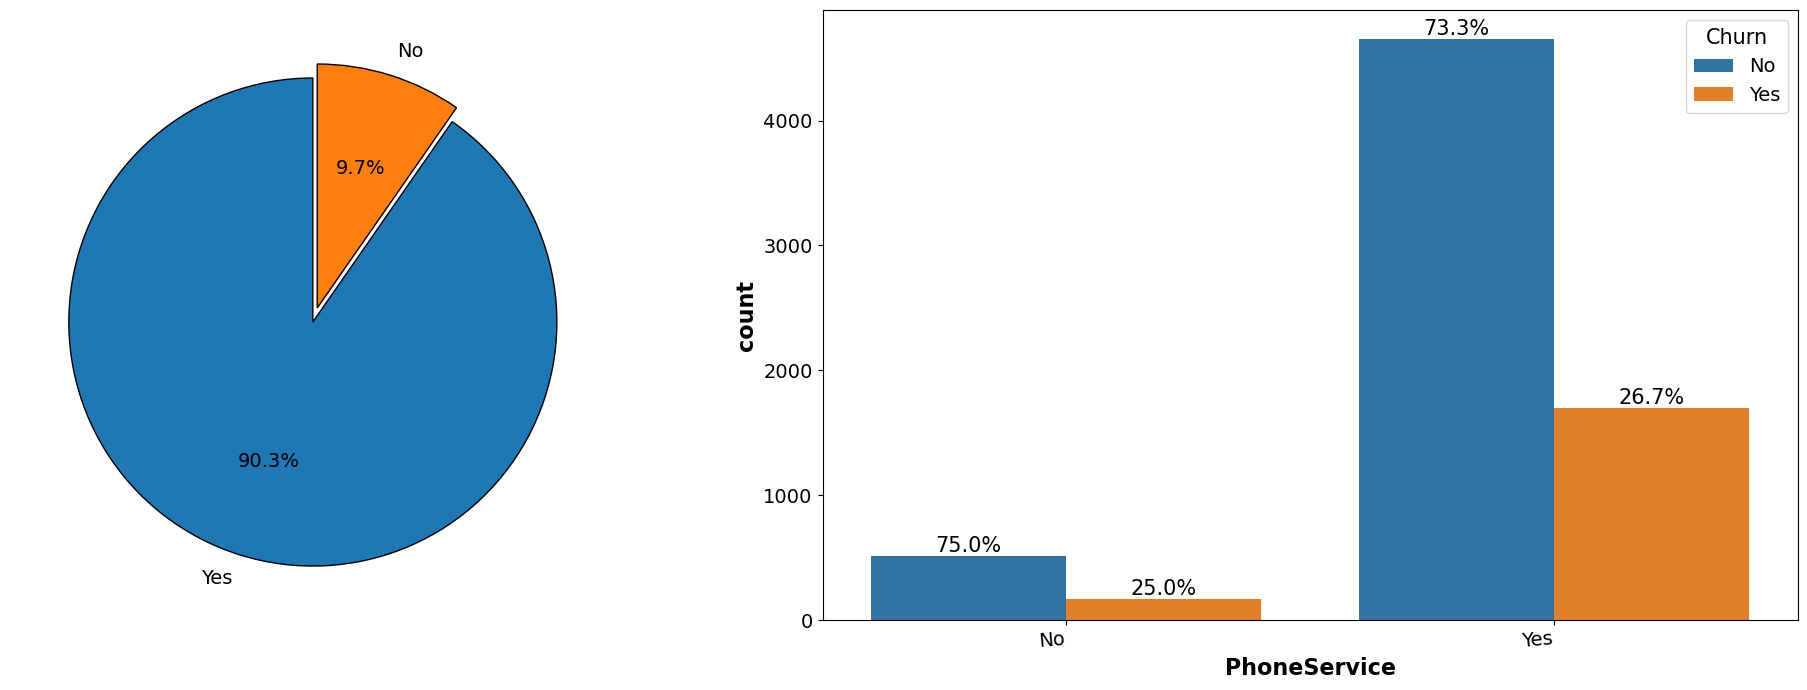

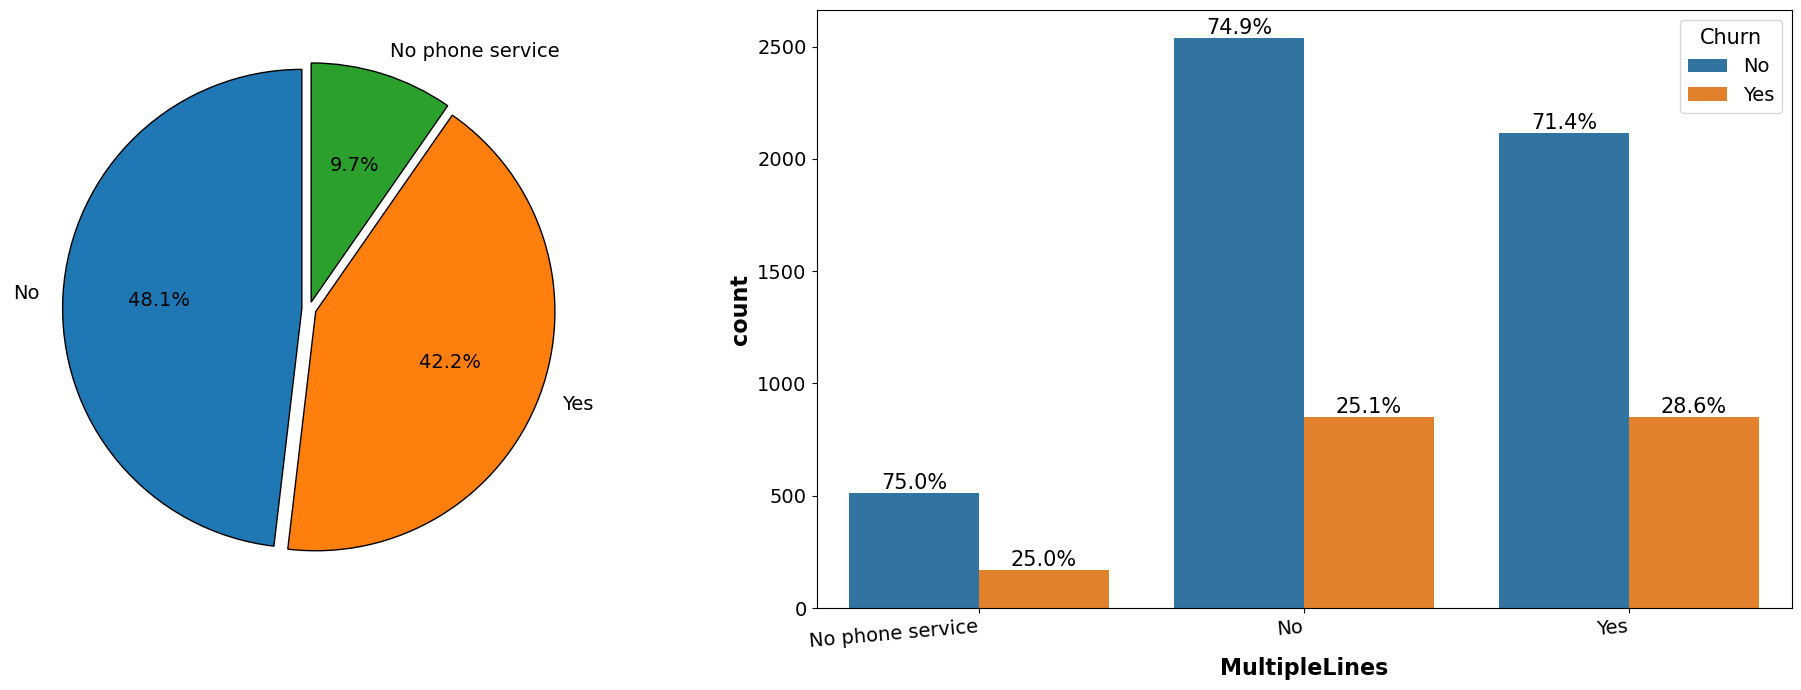

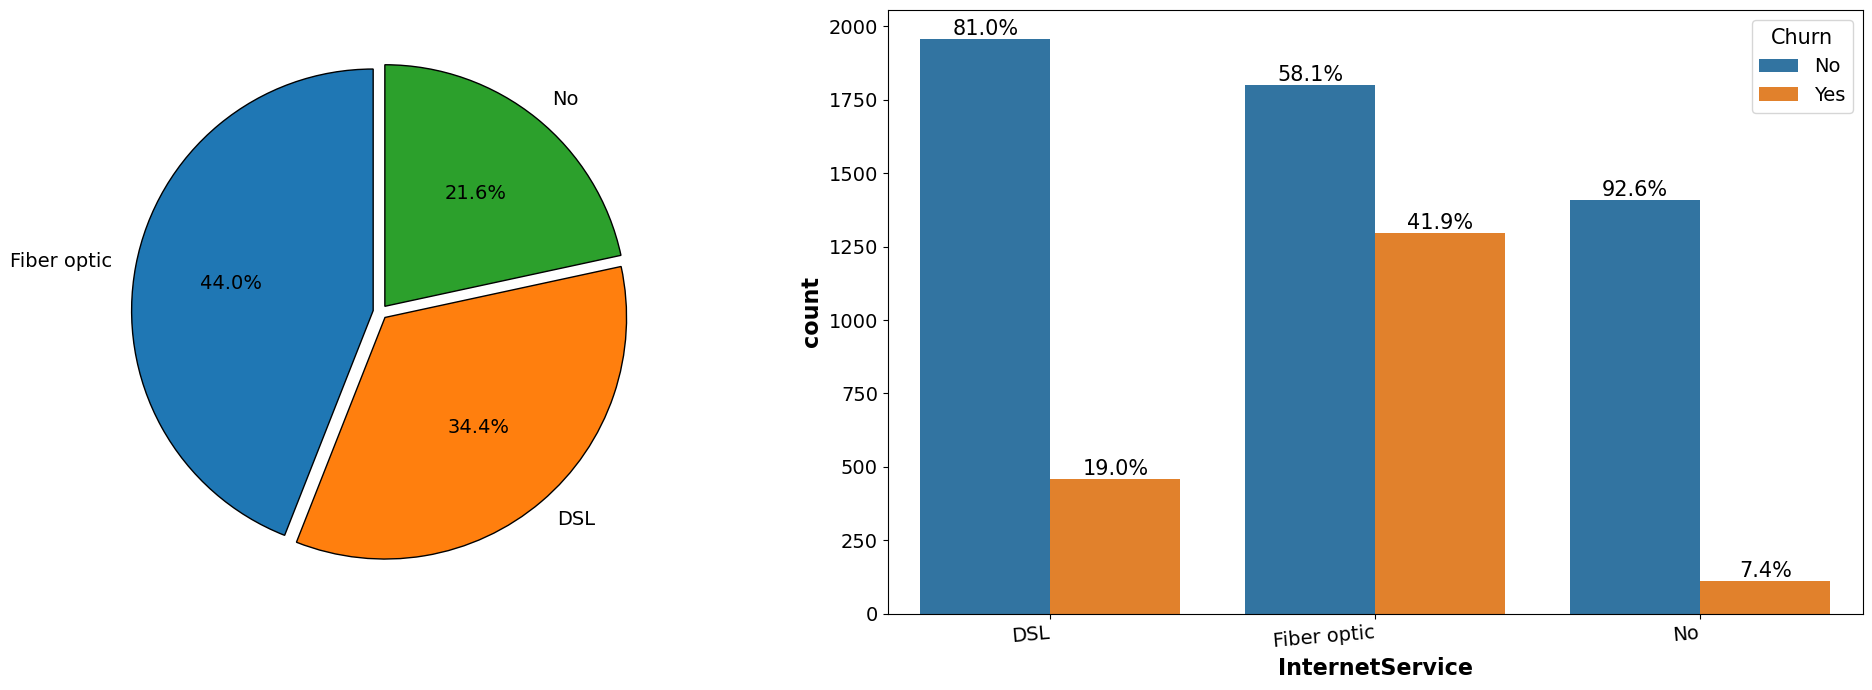

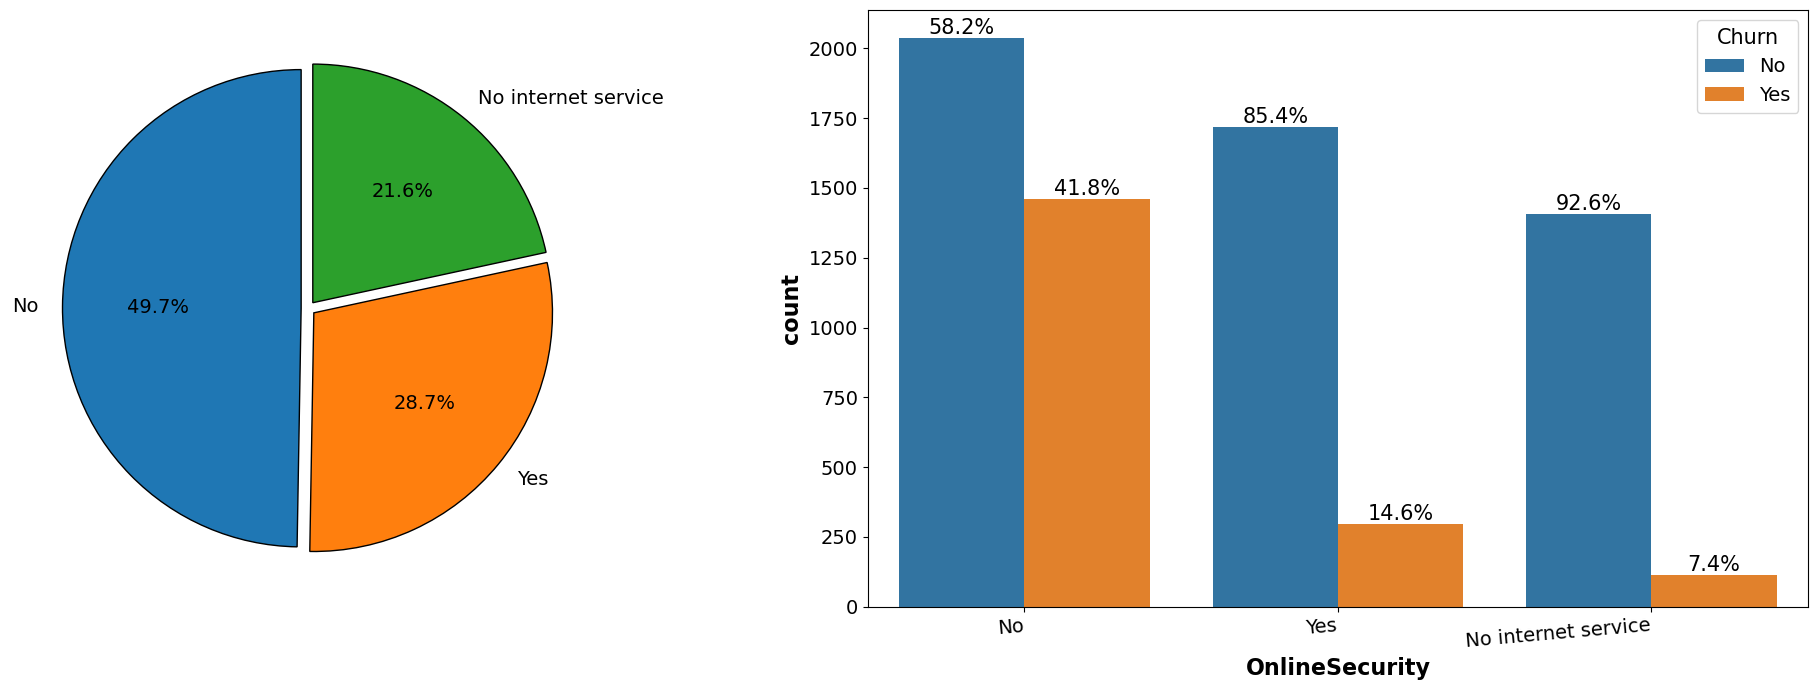

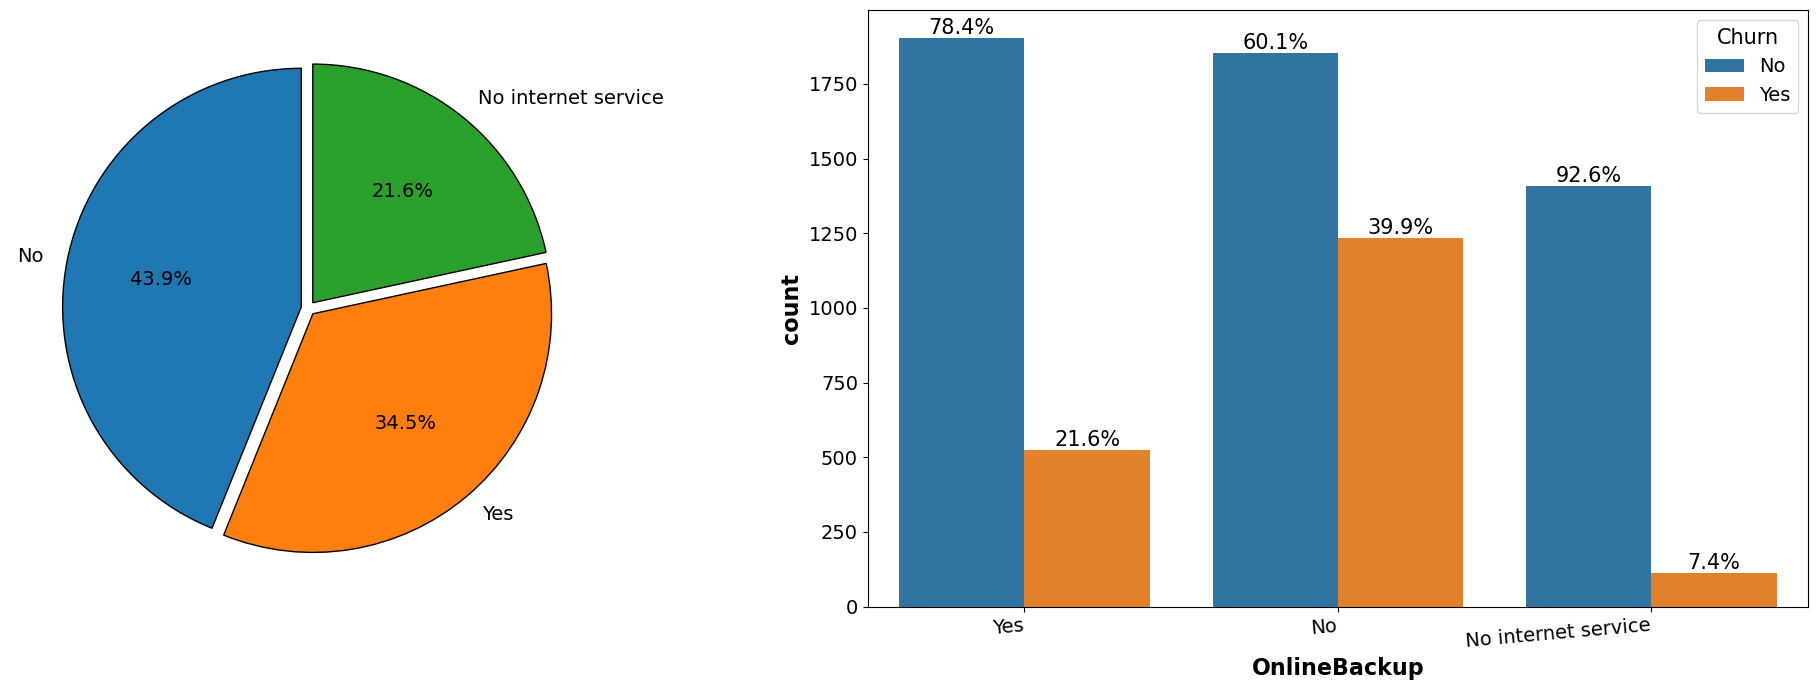

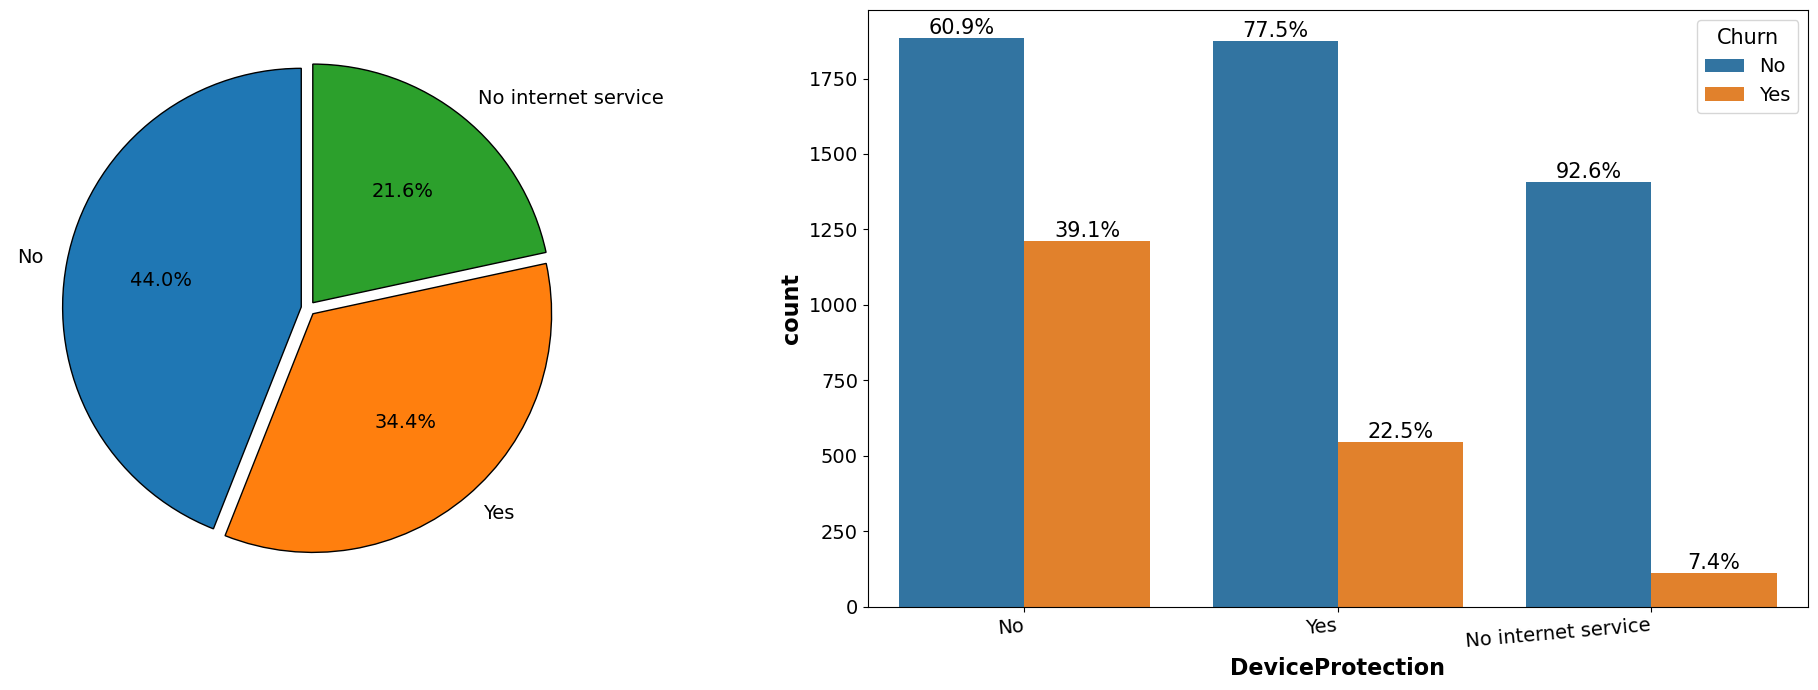

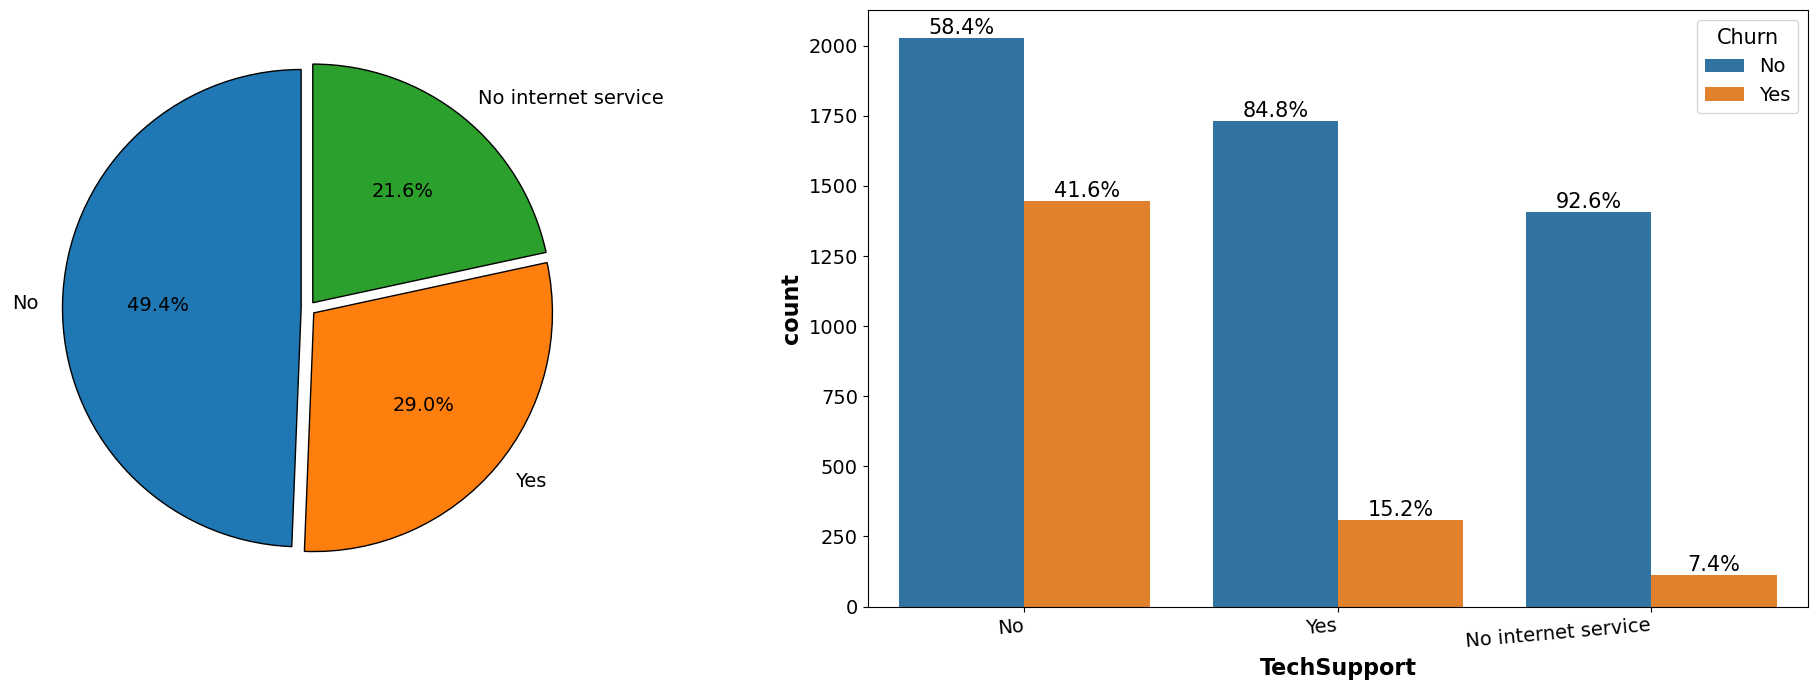

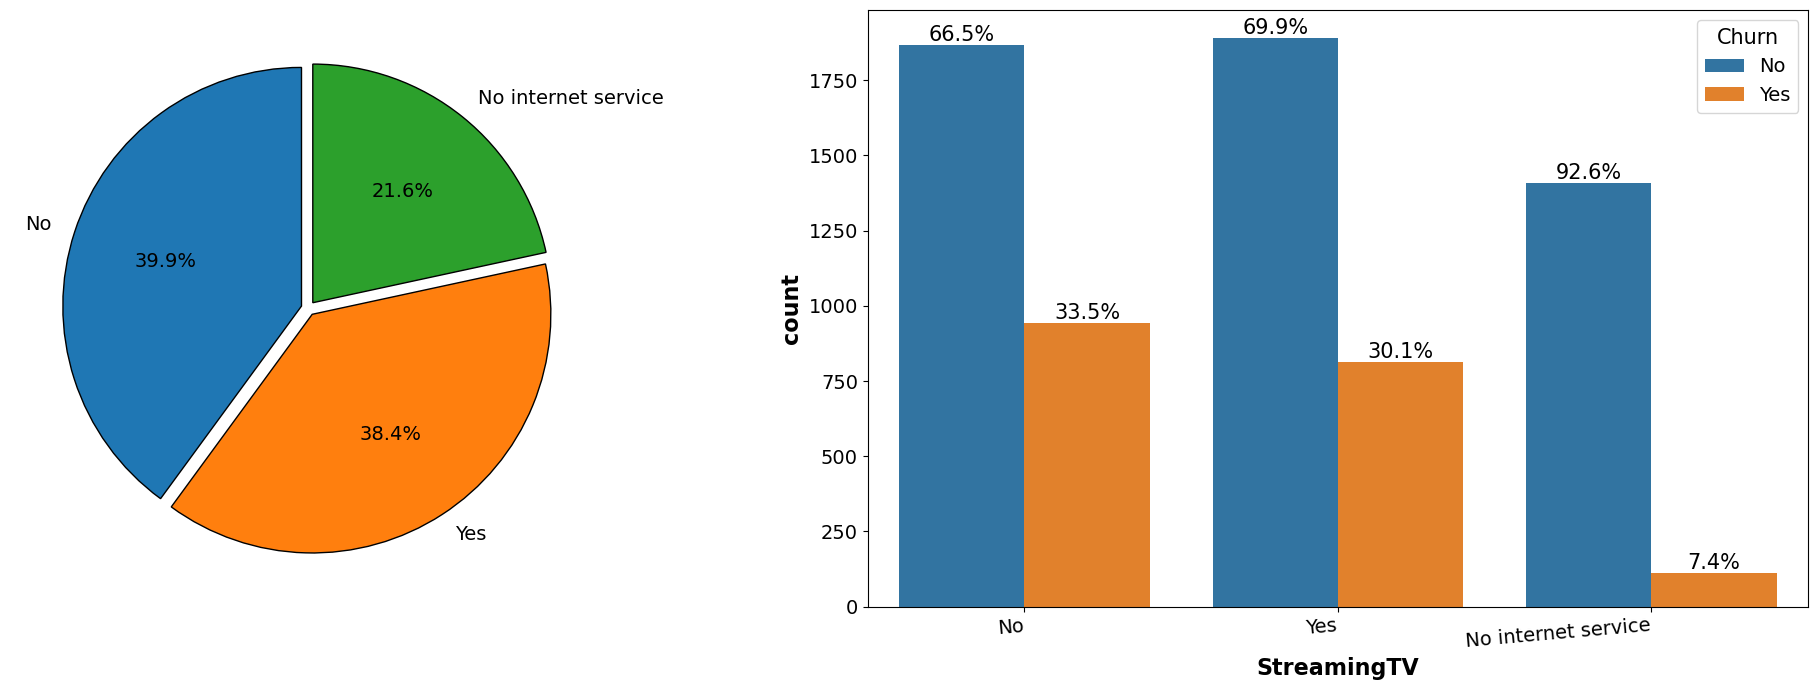

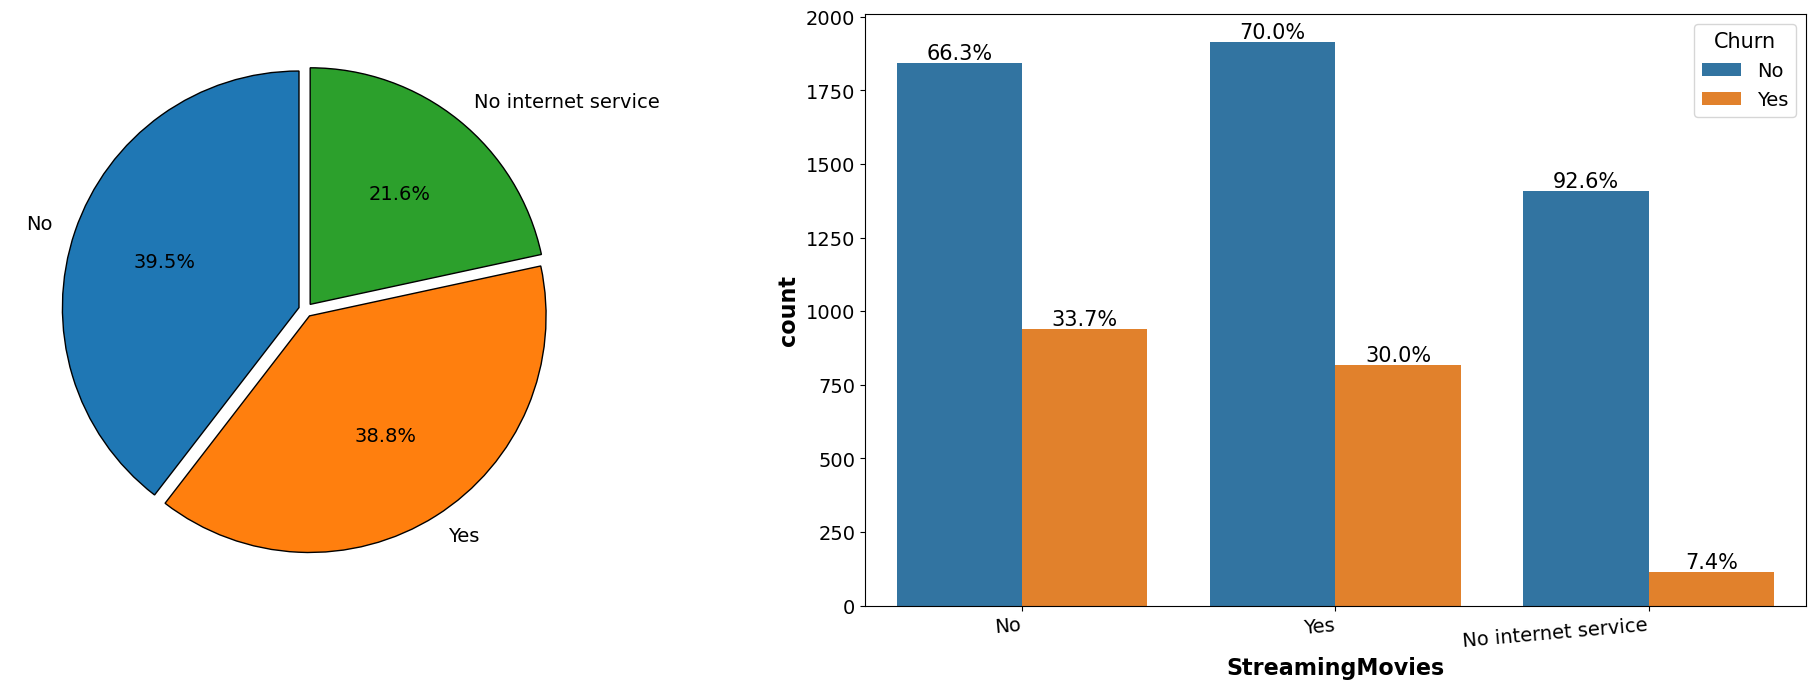

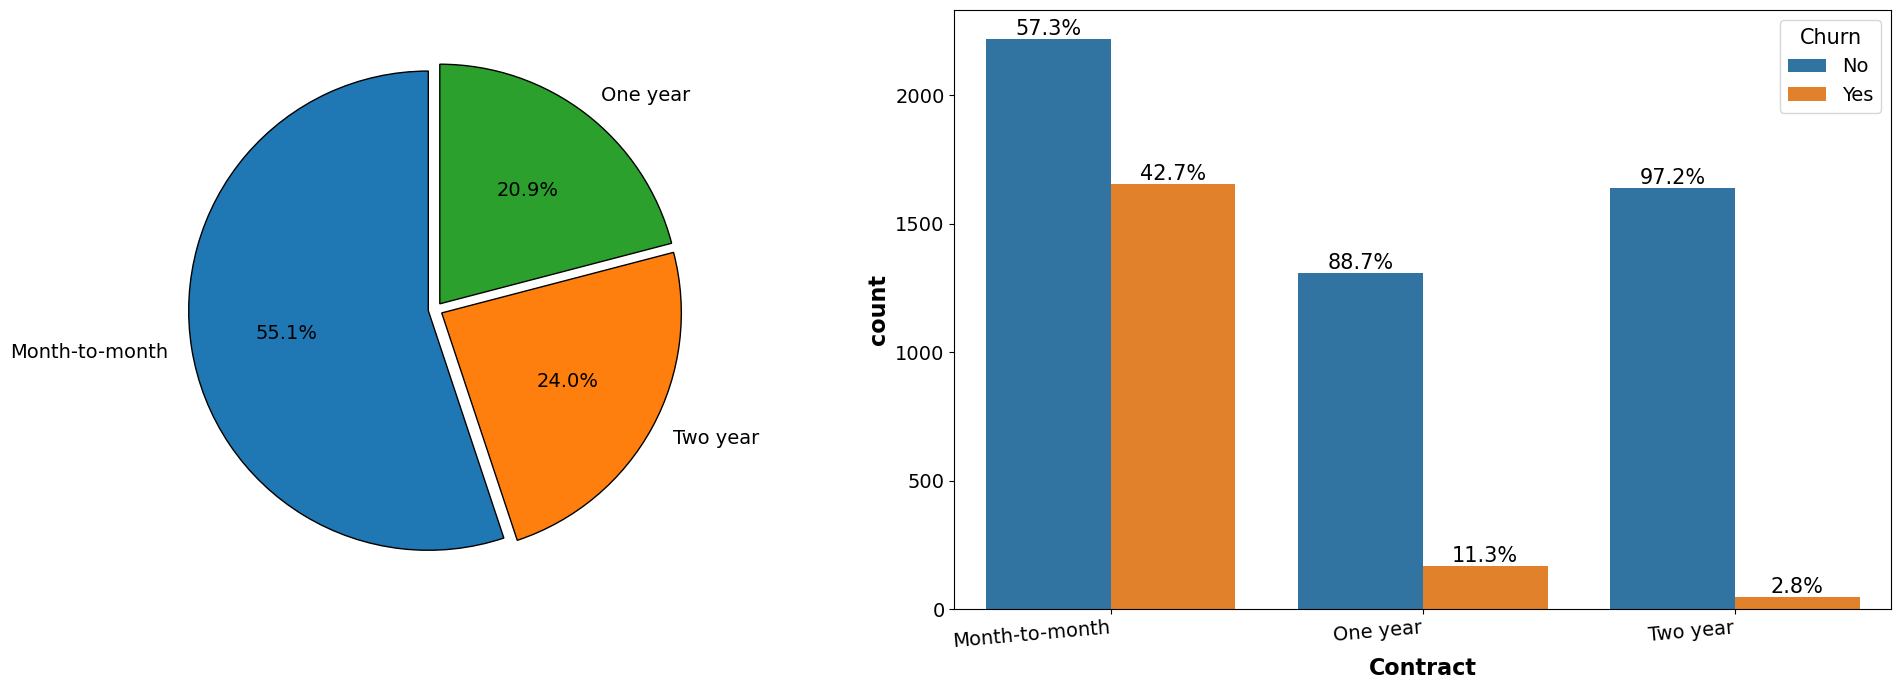

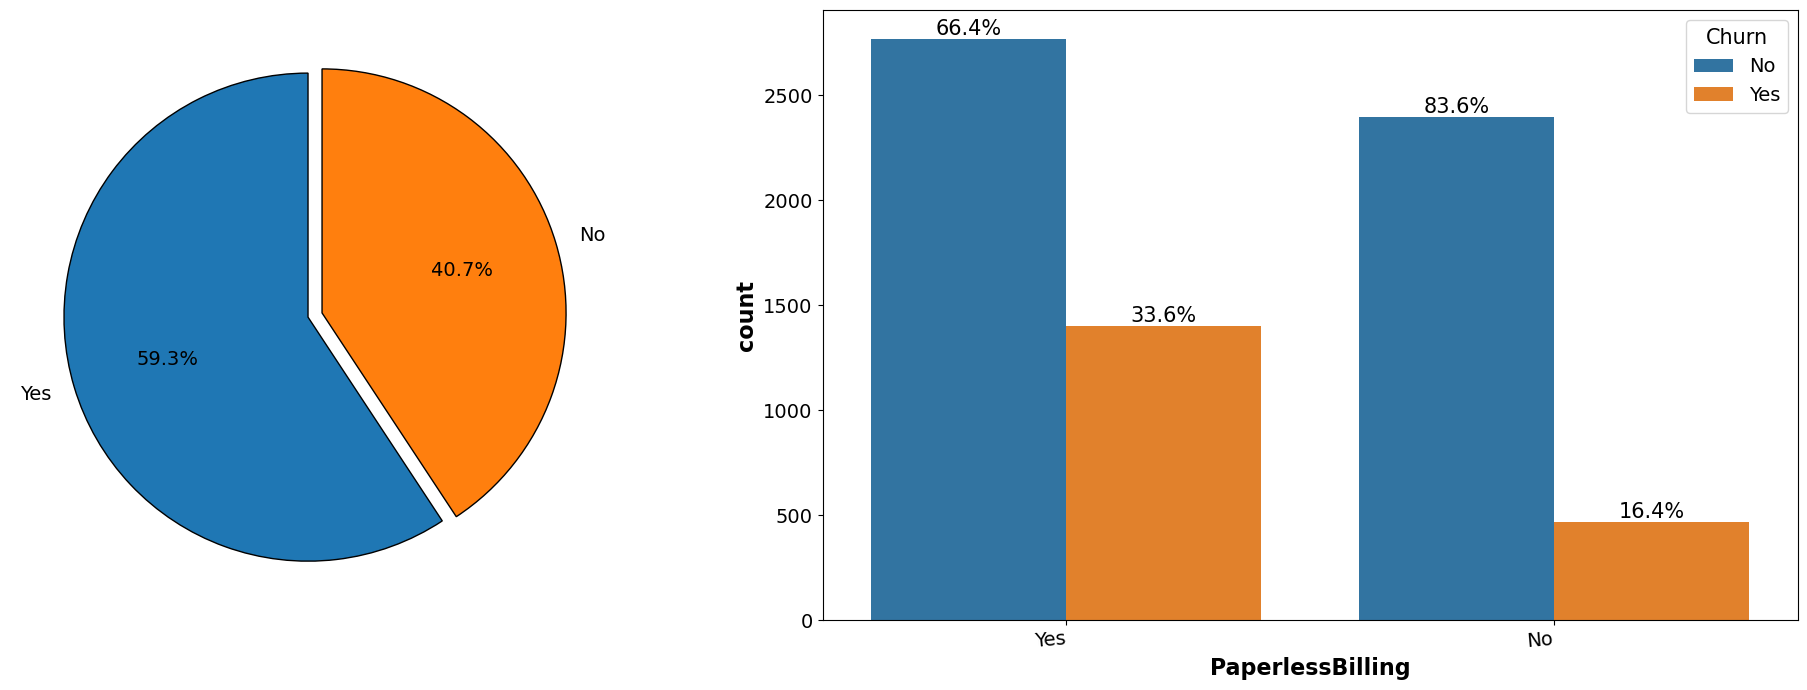

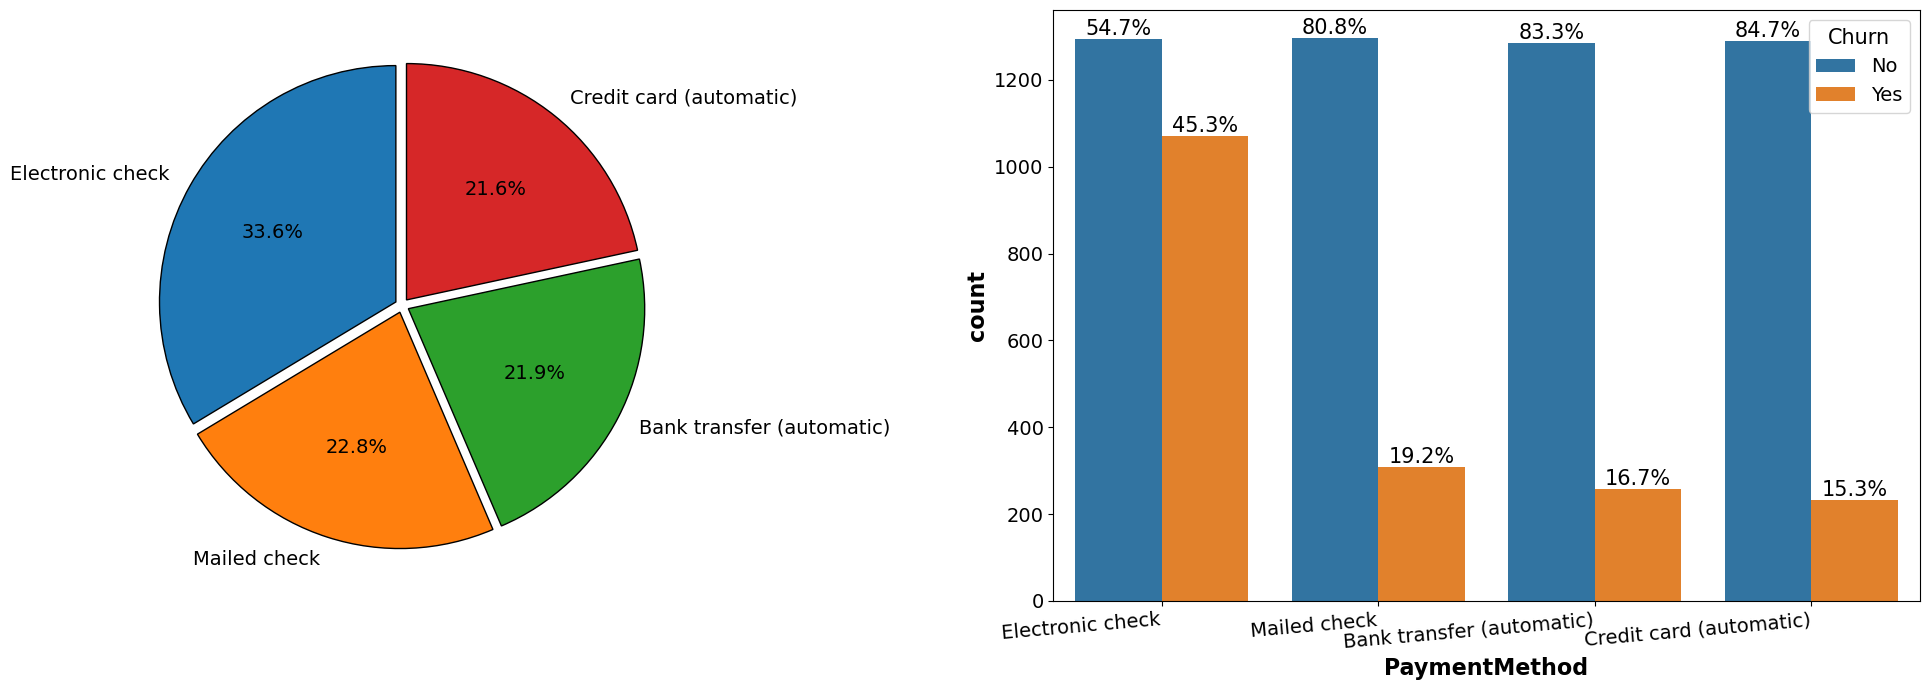

In [60]:
count_pie__hue_plot(df2)

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">

- The churning pattern for males and females is almost same.
- Senior citizens are twice as likely to churn (41.7%) as compared to the non-senior citizens (23.7%).
- Customers not having partners or dependents are more likely to churn.
- Customers using ‘Fibre optic’ as internet service are more likely to churn.
- Customer having no Online Security, Online Backup, Device protection, Tech Support are more likely to churn.
- Customers on ‘month-to-month’ contract are more likely to churn.
- Customers opting for ‘Electronic check’ as payment method are more likely to churn.

In [61]:
numerical_col

['tenure', 'MonthlyCharges', 'TotalCharges']

In [62]:
def kdeplot_plot(df):
    list_cols = list(numerical_col)
    fig, ax1 = plt.subplots(ncols=3, nrows=1, figsize=(30,10))
    ax1 = ax1.flatten()

    for i, col in enumerate(list_cols): 

        ax = sns.kdeplot(df[col][(df["Churn"] == 0)], ax=ax1[i], color='#066080', fill= True, alpha=.6)
        ax = sns.kdeplot(df[col][(df["Churn"] == 1)], ax=ax1[i], color='#FF5348', fill= True, alpha=.6)
        ax.legend(["Not Churn","Churn"],loc='upper right',fontsize= 20)
        ax1[i].set_ylabel('Density',fontsize = 25)
        ax1[i].set_xlabel(col, fontsize = 25, fontweight='bold')
        ax.tick_params(axis='x',labelsize=23)
        ax.tick_params(axis='y',labelsize=23)
    plt.tight_layout()

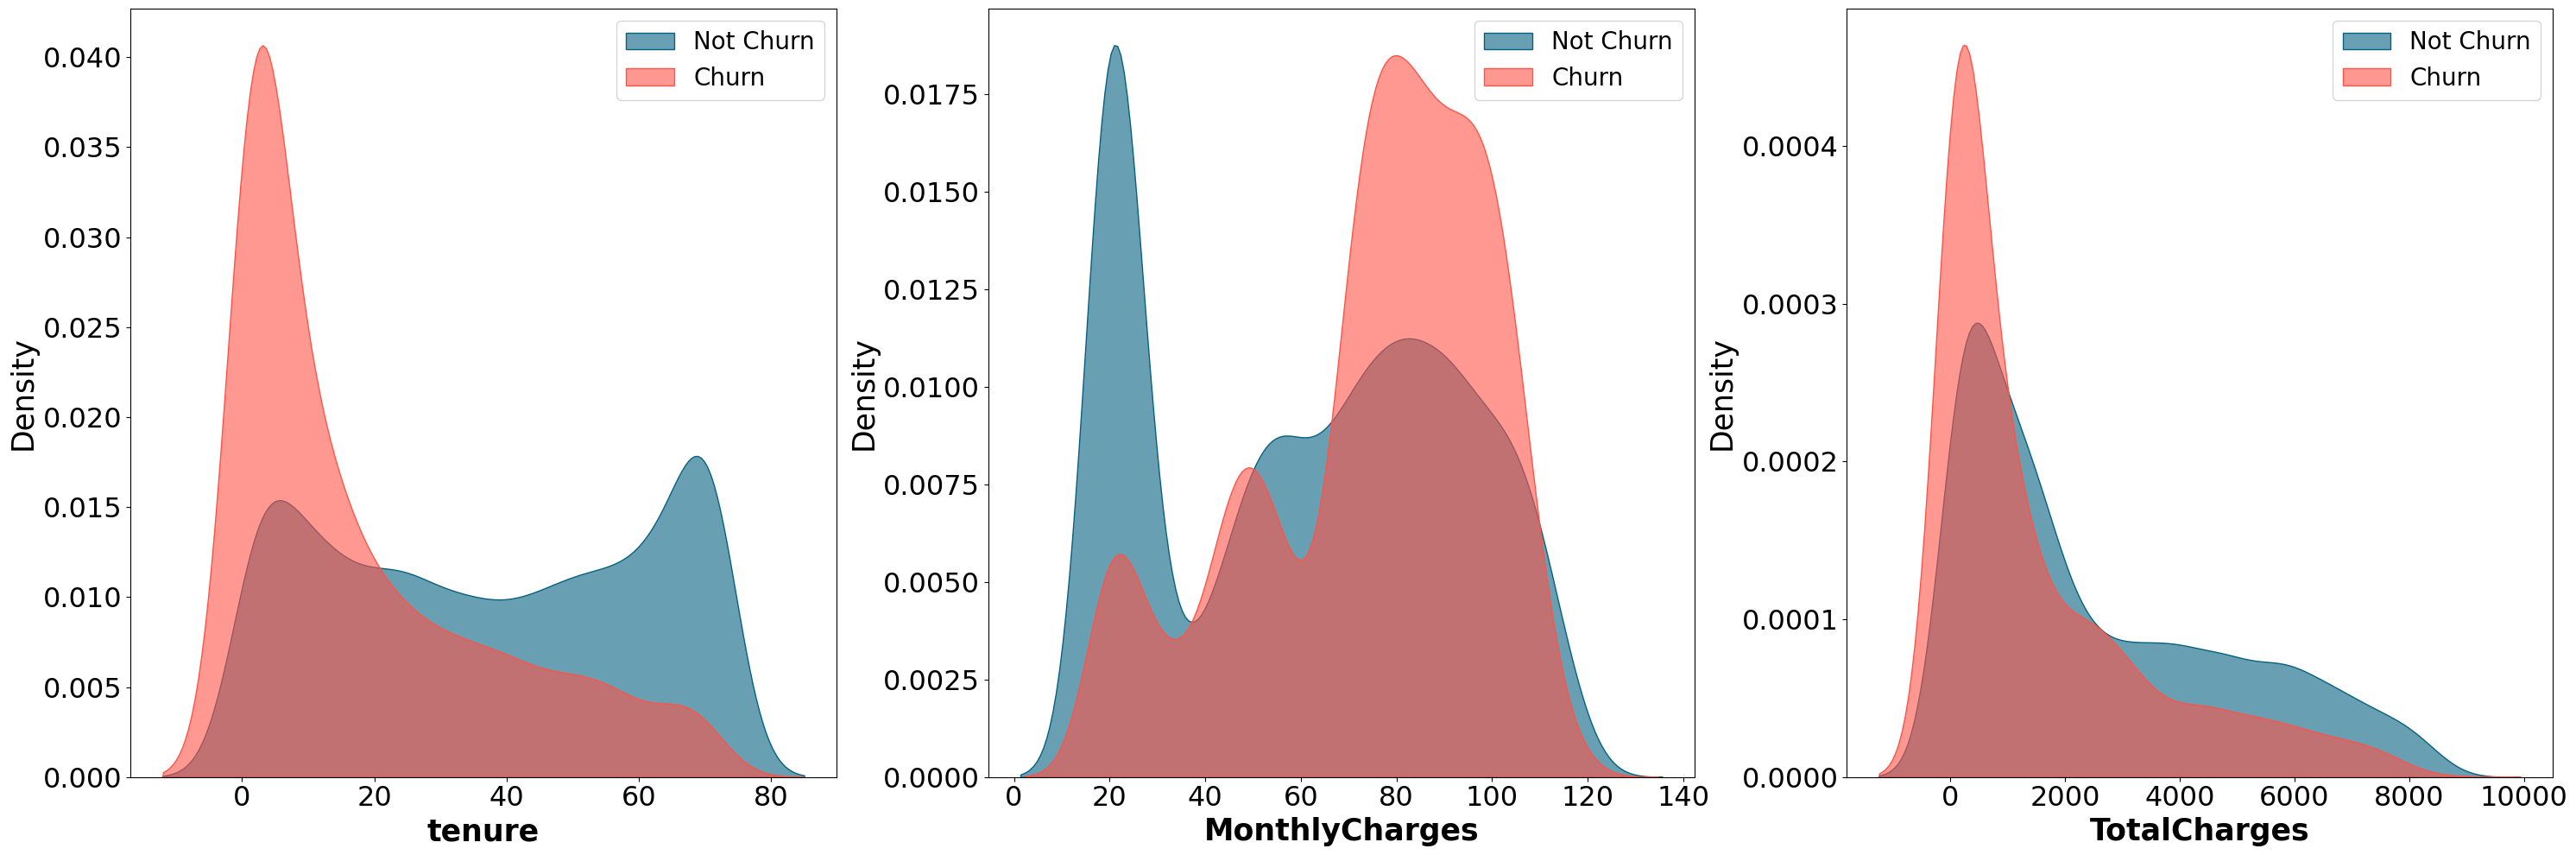

In [63]:
kdeplot_plot(df3)

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
- New customers (i.e., having low tenure value) are more likely to churn. 
- Customers are likely to churn when monthly charges are large. 
- Customers with high total charges are less likely to churn.

### 3. MULTIVARIATE ANALYSIS

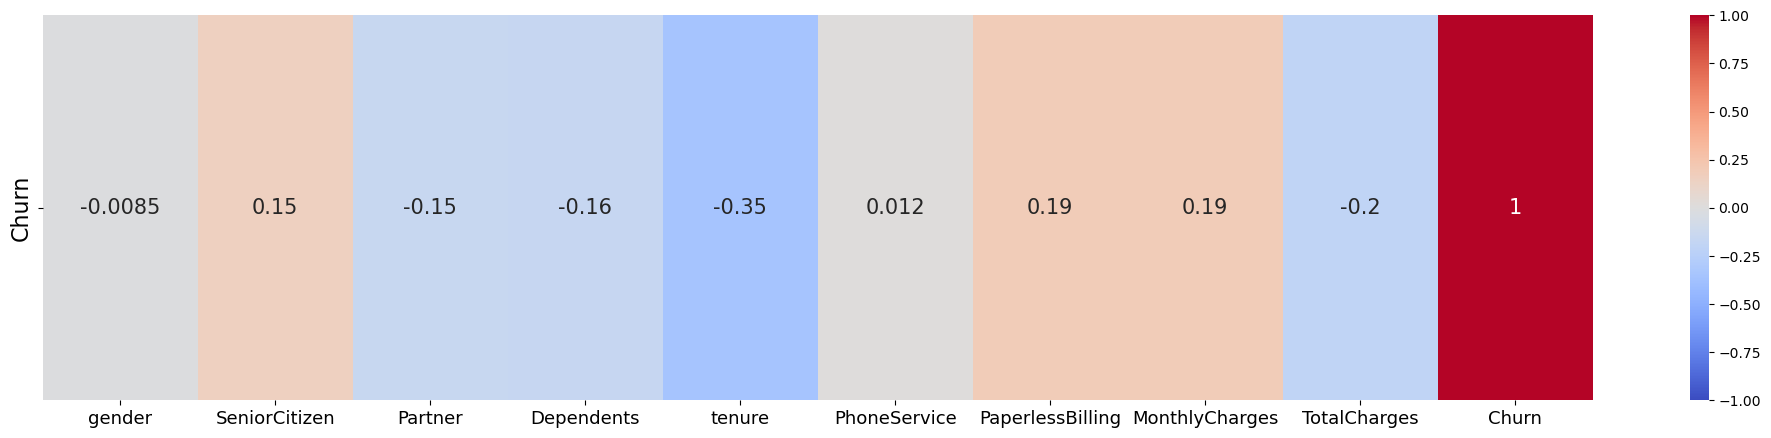

In [64]:
plt.figure(figsize=(25,5))
a = df3.corr().loc['Churn':]
sns.heatmap(a, vmin=-1, cmap='coolwarm', annot = True, annot_kws = {'size':15})
plt.yticks(fontsize=16)
plt.xticks(fontsize=13)
plt.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
    
- A negative correlation between 'tenure' and 'churn' suggests a high churn count for low tenure values.
- A negative correlation between 'total charges' and 'churn' suggests a high churn count for low total charges and vice-versa.

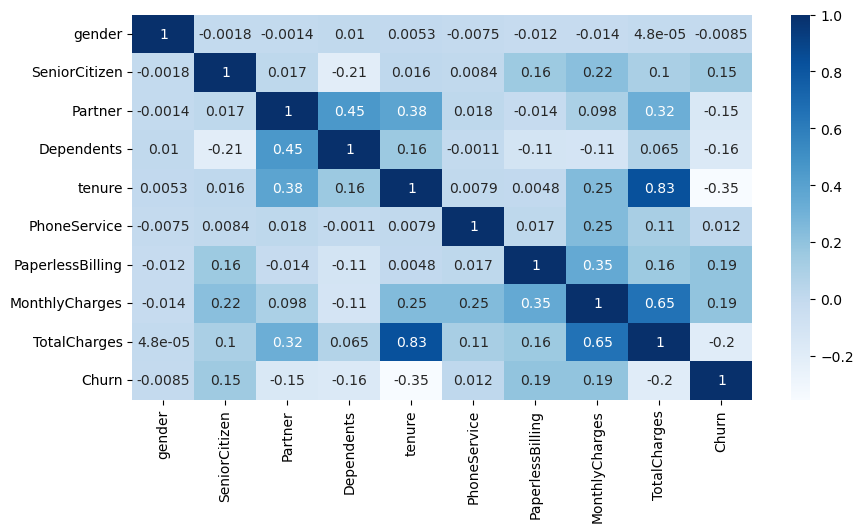

In [65]:
# we also need label encoded features here, so we will use dataframe df3

plt.figure(figsize=(10, 5))
sns.heatmap(df3.corr(), annot=True, cmap='Blues')
plt.show()

<div style=" background-color:#3b3745;text-align:left; padding: 13px 13px; border-radius: 8px; color: white">
'tenure' and 'TotalCharges' are showing high correlation which is very obvious because as the number of months for which a customer uses a service increases, total charges also increase accordingly.

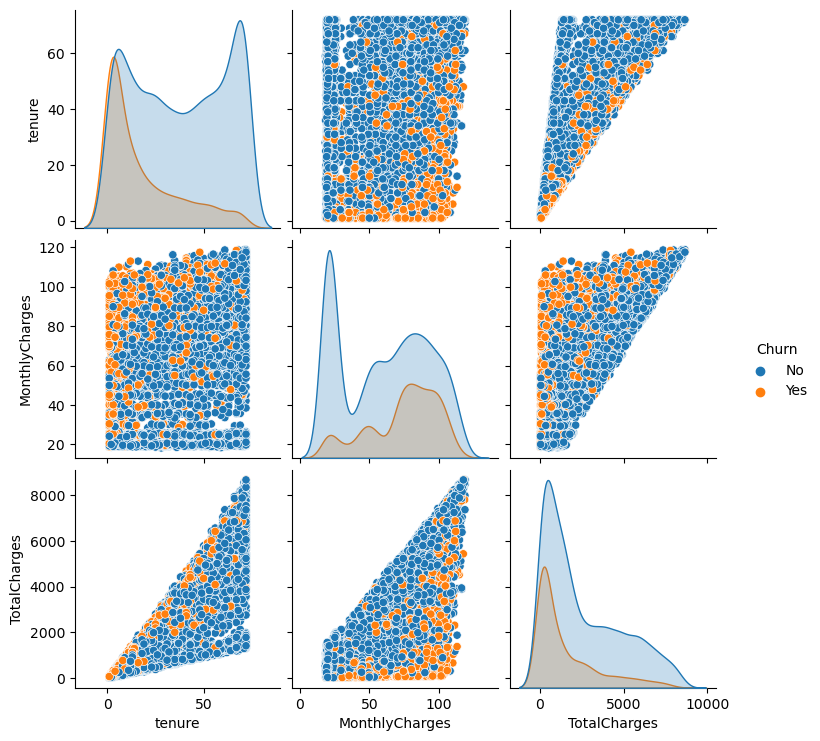

In [66]:
sns.pairplot(df2, hue='Churn', vars= categoric_numeric_separator_1(df2)[1])

#  <span style='color:#E1B12D'>3. Data Preprocessing</span></b> 


In [67]:
# df4 is the dataframe after one-hot encoding and label encoding

df5 = df4.copy()

In [68]:
df5.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
0                 1           29.85         29.85      0  ...   
1                 0           56.95       1889.50      0  ...   
2                 1           53.85        108.15      1  ...   
3                 0           42.30       1840.75      0  ...   
4                 1           70.70        151.65      1  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0                0                                0                0   
1                0                                0                0   
2                0                                0                0   
3                1                                0                0   
4                0                                0                0   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                    0                    0   
1                                    0                    0   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 31 columns]

In [69]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   PaperlessBilling                       7032 non-null   int64  
 7   MonthlyCharges                         7032 non-null   float64
 8   TotalCharges                           7032 non-null   float64
 9   Churn                                  7032 non-null   int64  
 10  MultipleLines_No phone service         7032 non-null   uint8  
 11  Mult

In [70]:
# separating the target feature 'churn' from the rest of the dataset

X = df5.drop('Churn', axis=1)
y = df5['Churn']

In [71]:
# splitting the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 50)

In [72]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1670       0              0        0           0      29             1   
4147       1              0        0           0       6             1   
5533       0              0        1           0      67             1   
3034       1              1        1           0      72             0   
3665       0              0        0           0       1             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
1670                 1           78.90       2384.15   
4147                 1           74.90        469.80   
5533                 0           86.15       5883.85   
3034                 1           64.45       4641.10   
3665                 1           75.10         75.10   

      MultipleLines_No phone service  ...  TechSupport_Yes  \
1670                               0  ...                0   
4147                               0  ...                0   
5533                               0  ...                1   
3034                               1  ...                1   
3665                               0  ...                0   

      StreamingTV_No internet service  StreamingTV_Yes  \
1670                                0                1   
4147                                0                0   
5533                                0                1   
3034                                0                1   
3665                                0                0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
1670                                    0                    0   
4147                                    0                    0   
5533                                    0                    1   
3034                                    0                    1   
3665                                    0                    0   

      Contract_One year  Contract_Two year  \
1670                  0                  0   
4147                  0                  0   
5533                  0                  1   
3034                  0                  1   
3665                  0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1670                                      0                               1   
4147                                      0                               1   
5533                                      0                               0   
3034                                      1                               0   
3665                                      0                               1   

      PaymentMethod_Mailed check  
1670                           0  
4147                           0  
5533                           0  
3034                           0  
3665                           0  

[5 rows x 30 columns]

In [73]:
X_test.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
4452       1              0        1           0      18             1   
732        0              0        1           1      72             1   
5505       0              0        0           0       1             1   
5855       0              0        1           0      47             1   
914        0              1        0           0      23             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
4452                 0           78.20       1468.75   
732                  0           79.05       5730.70   
5505                 1           48.45         48.45   
5855                 0           19.65        921.55   
914                  1           75.40       1643.55   

      MultipleLines_No phone service  ...  TechSupport_Yes  \
4452                               0  ...                1   
732                                0  ...                0   
5505                               0  ...                0   
5855                               0  ...                0   
914                                0  ...                0   

      StreamingTV_No internet service  StreamingTV_Yes  \
4452                                0                0   
732                                 0                0   
5505                                0                0   
5855                                1                0   
914                                 0                0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
4452                                    0                    0   
732                                     0                    0   
5505                                    0                    0   
5855                                    1                    0   
914                                     0                    0   

      Contract_One year  Contract_Two year  \
4452                  0                  0   
732                   0                  1   
5505                  0                  0   
5855                  0                  1   
914                   0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4452                                      0                               1   
732                                       0                               0   
5505                                      0                               0   
5855                                      0                               0   
914                                       0                               0   

      PaymentMethod_Mailed check  
4452                           0  
732                            0  
5505                           0  
5855                           0  
914                            0  

[5 rows x 30 columns]

In [74]:
# performing z-score scaling approach on numerical columns only

ss = StandardScaler()

ss.fit(X_train[numerical_col])
X_train[numerical_col] = ss.transform(X_train[numerical_col])
X_test[numerical_col] = ss.transform(X_test[numerical_col])

In [75]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
1670       0              0        0           0 -0.133618             1   
4147       1              0        0           0 -1.069656             1   
5533       0              0        1           0  1.412879             1   
3034       1              1        1           0  1.616366             0   
3665       0              0        0           0 -1.273143             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
1670                 1        0.475385      0.049524   
4147                 1        0.342984     -0.794873   
5533                 0        0.715361      1.593201   
3034                 1       -0.002912      1.045038   
3665                 1        0.349604     -0.968971   

      MultipleLines_No phone service  ...  TechSupport_Yes  \
1670                               0  ...                0   
4147                               0  ...                0   
5533                               0  ...                1   
3034                               1  ...                1   
3665                               0  ...                0   

      StreamingTV_No internet service  StreamingTV_Yes  \
1670                                0                1   
4147                                0                0   
5533                                0                1   
3034                                0                1   
3665                                0                0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
1670                                    0                    0   
4147                                    0                    0   
5533                                    0                    1   
3034                                    0                    1   
3665                                    0                    0   

      Contract_One year  Contract_Two year  \
1670                  0                  0   
4147                  0                  0   
5533                  0                  1   
3034                  0                  1   
3665                  0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
1670                                      0                               1   
4147                                      0                               1   
5533                                      0                               0   
3034                                      1                               0   
3665                                      0                               1   

      PaymentMethod_Mailed check  
1670                           0  
4147                           0  
5533                           0  
3034                           0  
3665                           0  

[5 rows x 30 columns]

In [76]:
X_test.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
4452       1              0        1           0 -0.581288             1   
732        0              0        1           1  1.616366             1   
5505       0              0        0           0 -1.273143             1   
5855       0              0        1           0  0.598933             1   
914        0              1        0           0 -0.377802             1   

      PaperlessBilling  MonthlyCharges  TotalCharges  \
4452                 0        0.452215     -0.354248   
732                  0        0.480350      1.525648   
5505                 1       -0.532514     -0.980726   
5855                 0       -1.485798     -0.595612   
914                  1        0.359535     -0.277146   

      MultipleLines_No phone service  ...  TechSupport_Yes  \
4452                               0  ...                1   
732                                0  ...                0   
5505                               0  ...                0   
5855                               0  ...                0   
914                                0  ...                0   

      StreamingTV_No internet service  StreamingTV_Yes  \
4452                                0                0   
732                                 0                0   
5505                                0                0   
5855                                1                0   
914                                 0                0   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
4452                                    0                    0   
732                                     0                    0   
5505                                    0                    0   
5855                                    1                    0   
914                                     0                    0   

      Contract_One year  Contract_Two year  \
4452                  0                  0   
732                   0                  1   
5505                  0                  0   
5855                  0                  1   
914                   0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4452                                      0                               1   
732                                       0                               0   
5505                                      0                               0   
5855                                      0                               0   
914                                       0                               0   

      PaymentMethod_Mailed check  
4452                           0  
732                            0  
5505                           0  
5855                           0  
914                            0  

[5 rows x 30 columns]

In [77]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(4922, 30) (2110, 30)
(4922,) (2110,)


#  <span style='color:#E1B12D'>4. Model training and analysis</span></b> 

### LOGISTIC REGRESSION

In [78]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [79]:
y_pred = log_reg.predict(X_test)

In [80]:
logmodel_accuracy = round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
logmodel_precision = round(metrics.precision_score(y_test, y_pred) * 100, 2)
logmodel_recall = round(metrics.recall_score(y_test, y_pred) * 100, 2)
logmodel_f1 = round(metrics.f1_score(y_test, y_pred) * 100, 2)

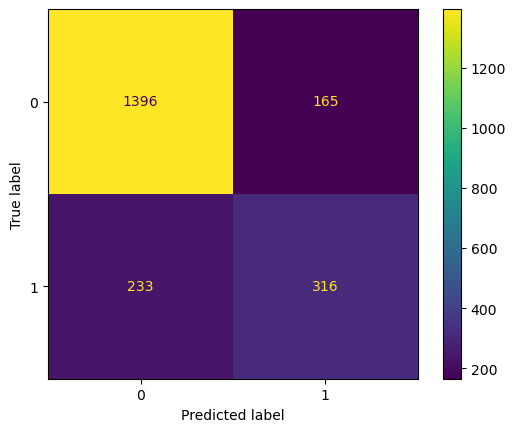

In [81]:
## Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#plot_confusion_matrix(log_reg, X_test, Y_test)  
cm = confusion_matrix(y_test, y_pred,labels= log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = log_reg.classes_)
disp.plot()
plt.show()

In [82]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1561
           1       0.66      0.58      0.61       549

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110



In [83]:
print(f"Accuracy score for logistic regression is: {accuracy_score(y_test,y_pred)}")

Accuracy score for logistic regression is: 0.8113744075829384


In [84]:
# TRAIN ACCURACY

y_train_pred = log_reg.predict(X_train)
logreg_train_accuracy = round(metrics.accuracy_score(y_train,y_train_pred)*100,2)

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### KNN

In [85]:
## Fit the KNN classifier model to the train dataset for default value of neighbors initially
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [86]:
## compute y predicted labels
y_pred_knn = knn.predict(X_test)
y_pred_knn[:10]

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

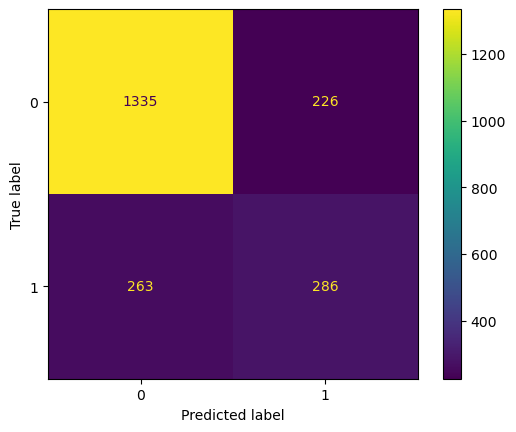

In [87]:
## Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#plot_confusion_matrix(log_reg, X_test, Y_test)  
cm = confusion_matrix(y_test, y_pred_knn,labels= knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = knn.classes_)
disp.plot()
plt.show()

In [88]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      1561
           1       0.56      0.52      0.54       549

    accuracy                           0.77      2110
   macro avg       0.70      0.69      0.69      2110
weighted avg       0.76      0.77      0.77      2110



In [89]:
accuracy_score(y_test,y_pred_knn)

0.7682464454976303

#### Choosing optimal K value
- In KNN Choice of k is very critical. A small value of k means that noise will have a higher influence on the result. A large value makes it computationally expensive and is contradictory to the basic idea behind KNN, that close points might have similar densities or classes.The default parameter for the number of neighbors k is 5.

In [90]:
error_rate = []

for i in range(1,30):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

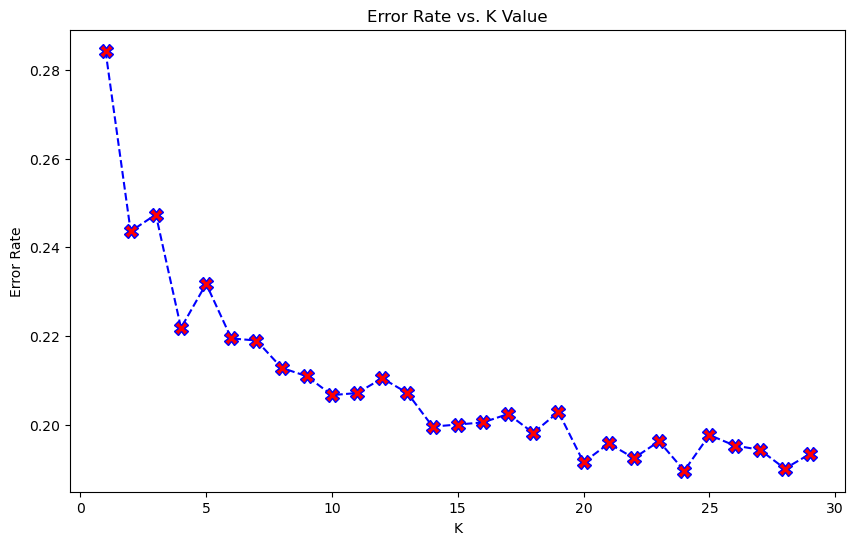

In [91]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', marker='X',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

#### The least error rate is for k= 24

In [112]:
## Model 2: KNN classfier with optimal K=26
knn_optimal = KNeighborsClassifier(n_neighbors=24)
knn_optimal.fit(X_train,y_train)

## y predicted
y_pred_knn_optimal = knn_optimal.predict(X_test)

In [113]:
### Comparison of the two KNN classification models
print('accuracy (default K):',accuracy_score(y_test,y_pred_knn))
print('accuracy (k=24)      :',accuracy_score(y_test,y_pred_knn_optimal))

accuracy (default K): 0.7682464454976303
accuracy (k=24)      : 0.8104265402843602


In [114]:
## Compute precision, recall and F1-score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_knn_optimal))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1561
           1       0.66      0.56      0.61       549

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.81      2110



In [115]:
# for Test Data

knn_accuracy = round(metrics.accuracy_score(y_test, y_pred_knn_optimal) * 100, 2)
knn_precision = round(metrics.precision_score(y_test, y_pred_knn_optimal) * 100, 2)
knn_recall = round(metrics.recall_score(y_test, y_pred_knn_optimal) * 100, 2)
knn_f1 = round(metrics.f1_score(y_test, y_pred_knn_optimal) * 100, 2)

In [116]:
# TRAIN ACCURACY

y_train_pred_knn = knn_optimal.predict(X_train)
knn_train_accuracy = round(metrics.accuracy_score(y_train,y_train_pred_knn)*100,2)

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Naive bayes

In [97]:
# Now we’ll import and instantiate the Gaussian Naive Bayes module from SKlearn GaussianNB. 
# To fit the model, we pass x_train and y_train.

gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [98]:
## compute y predicted labels
y_pred_gnb = gnb.predict(X_test)
y_pred_gnb[:10]

array([1, 0, 1, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

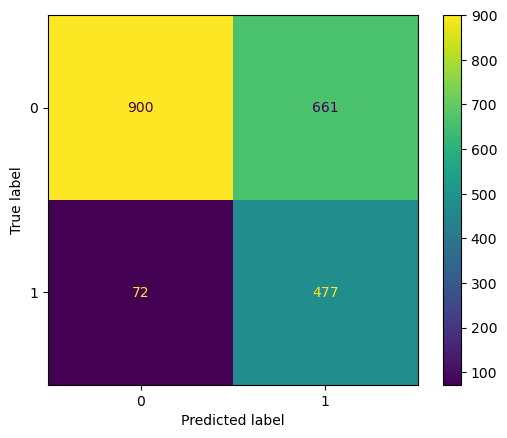

In [99]:
## Confusion matrix

#plot_confusion_matrix(log_reg, X_test, Y_test)  
cm = confusion_matrix(y_test, y_pred_gnb,labels= gnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = gnb.classes_)
disp.plot()
plt.show()

In [100]:
## Compute precision, recall and F1-score

print(classification_report(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.93      0.58      0.71      1561
           1       0.42      0.87      0.57       549

    accuracy                           0.65      2110
   macro avg       0.67      0.72      0.64      2110
weighted avg       0.79      0.65      0.67      2110



In [101]:
## TEST ACCURACY

print(f"Accuracy score for Naive Bayes is: {accuracy_score(y_test,y_pred_gnb)}")

Accuracy score for Naive Bayes is: 0.6526066350710901


In [102]:
gnb_accuracy = round(metrics.accuracy_score(y_test, y_pred_gnb) * 100, 2)
gnb_precision = round(metrics.precision_score(y_test, y_pred_gnb) * 100, 2)
gnb_recall = round(metrics.recall_score(y_test, y_pred_gnb) * 100, 2)
gnb_f1 = round(metrics.f1_score(y_test, y_pred_gnb) * 100, 2)

In [103]:
# TRAIN ACCURACY

y_train_pred_gnb = gnb.predict(X_train)
gnb_train_accuracy = round(accuracy_score(y_train,y_train_pred_gnb)*100,2)

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Comparing the performance of the three models

In [117]:
# Comparing the models on the basis of train and test accuracies

Model_Comparison_1 = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes'],
    'Train_Accuracy_Score': [logreg_train_accuracy, knn_train_accuracy, gnb_train_accuracy],
    'Test_Accuracy_Score': [logmodel_accuracy, knn_accuracy, gnb_accuracy]})
Model_Comparison_df_1 = Model_Comparison_1.sort_values(by='Test_Accuracy_Score', ascending=False)
Model_Comparison_df_1

Model  Train_Accuracy_Score  Test_Accuracy_Score
0  Logistic Regression                 80.37                81.14
1                  KNN                 80.25                81.04
2          Naive Bayes                 67.45                65.26

In [118]:
# Comparing the models on the basis of classification metrics

Model_Comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'Naive Bayes'],
    'Accuracy': [logmodel_accuracy, knn_accuracy, gnb_accuracy],
     'Recall': [logmodel_recall, knn_recall, gnb_recall],
     'Precision':[logmodel_precision, knn_precision, gnb_precision],
     'F1_Score': [logmodel_f1, knn_f1, gnb_f1]})
Model_Comparison_df = Model_Comparison.sort_values(by='Accuracy', ascending=False)
Model_Comparison_df

Model  Accuracy  Recall  Precision  F1_Score
0  Logistic Regression     81.14   57.56      65.70     61.36
1                  KNN     81.04   55.92      66.02     60.55
2          Naive Bayes     65.26   86.89      41.92     56.55

#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### AUC - ROC curve analysis

In [119]:
import pylab as pl
from sklearn import svm
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
random_state = np.random.RandomState(0)

In [120]:
classifier1 = LogisticRegression()
classifier2 = KNeighborsClassifier(n_neighbors=26)
classifier3 =  GaussianNB()
probas1_ = classifier1.fit(X_train, y_train).predict_proba(X_test)
probas2_ = classifier2.fit(X_train, y_train).predict_proba(X_test)
probas3_ = classifier2.fit(X_train, y_train).predict_proba(X_test)

In [121]:
# Compute ROC curve and area the curve for logistic
fpr1, tpr1, thresholds1 = roc_curve(y_test, probas1_[:, 1])
roc_auc1 = auc(fpr1, tpr1)
print("Area under the ROC curve : %f" % roc_auc1)

Area under the ROC curve : 0.842207


In [122]:
# Compute ROC curve and area the curve
fpr2, tpr2, thresholds2 = roc_curve(y_test, probas2_[:, 1])
roc_auc2 = auc(fpr2, tpr2)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.833385


In [123]:
# Compute ROC curve and area the curve
fpr3, tpr3, thresholds3 = roc_curve(y_test, probas3_[:, 1])
roc_auc3 = auc(fpr3, tpr3)
print("Area under the ROC curve : %f" % roc_auc2)

Area under the ROC curve : 0.833385


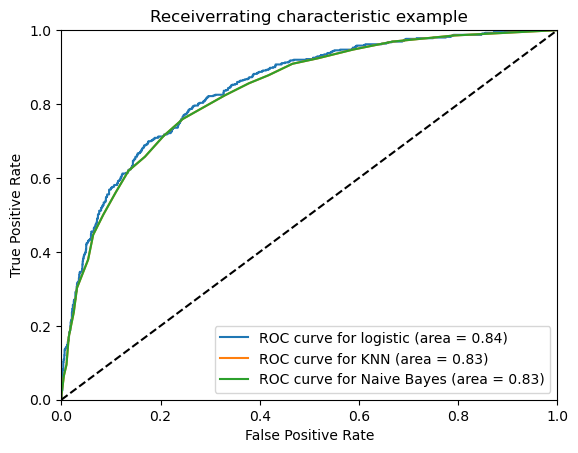

In [124]:
# Plot ROC curve
pl.clf()
pl.plot(fpr1, tpr1, label='ROC curve for logistic (area = %0.2f)' % roc_auc1)
pl.plot(fpr2, tpr2, label='ROC curve for KNN (area = %0.2f)' % roc_auc2)
pl.plot(fpr3, tpr3, label='ROC curve for Naive Bayes (area = %0.2f)' % roc_auc3)
pl.plot([0, 1], [0, 1],'k--')
pl.xlim([0.0, 1.0])
pl.ylim([0.0, 1.0])
pl.xlabel('False Positive Rate')
pl.ylabel('True Positive Rate')
pl.title('Receiverrating characteristic example')
pl.legend(loc="lower right")
pl.show()


#### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## Comments

- We are required to build a model that will help to identify the potential customers who have a higher probability to churn.
- One would want to avoid a situation where we predict a churn Customer as not-churn, because in such case we cannot work for customer retention.
- When a not-churn Customer is predicted to churn, any extra effort will not negatively effect the customer, but it can effect the company. This situation is affordable to some extent if it helps with identifying a churning customer .
- Since 'Recall' measures the ability of the model to correctly identify instances of a particular class('churn' in this case), it is a suitable metric to observe.
- The Naive Bayes model has the highest recall for the positive class (86.89%), means that it is better at identifying instances where customer is likely to churn. But it has low precision value and accuracy.

- From the ROC curve, it can be seen that the performance of KNN nad Niave Bayes model are almost same.

- Overall, Logistic Regression model is performing the best among all three as inferred from the ROC curve.

### Conclusion and improvisation:

- The recall scores are not how they should be if 'churing' customers are to be correctly predicted.
- This may have been due to the fact that we had 73.4% of the dataset having 'not-churn' values i.e. it was highly imbalanced.
- Necessary measures should be taken to deal with imbalanced datasets of such kind.